In [1]:
pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as tsp
%matplotlib inline
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [3]:
start_date = '2022-01-01'
end_date = '2023-03-31'

In [4]:
data = yf.download('BRITANNIA.NS', start = start_date, end= end_date)
data1= yf.download('COLPAL.NS', start = start_date, end= end_date)
data2= yf.download('DABUR.NS', start = start_date, end= end_date)
data3= yf.download('EMAMILTD.NS', start = start_date, end= end_date)
data4= yf.download('GODREJCP.NS', start = start_date, end= end_date)
data5= yf.download('HINDUNILVR.NS', start = start_date, end= end_date)
data6= yf.download('ITC.NS', start = start_date, end= end_date)
data7= yf.download('MARICO.NS', start = start_date, end= end_date)
data8= yf.download('MCDOWELL-N.NS', start = start_date, end= end_date)
data9= yf.download('NESTLEIND.NS', start = start_date, end= end_date)
data10= yf.download('PGHH.NS', start = start_date, end= end_date)
data11= yf.download('RADICO.NS', start = start_date, end= end_date)
data12= yf.download('TATACONSUM.NS', start = start_date, end= end_date)
data13= yf.download('UBL.NS', start = start_date, end= end_date)
data14= yf.download('VBL.NS', start = start_date, end= end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
print(data,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-01-03  3610.000000  3626.000000  3582.199951  3617.550049  3442.329346   
2022-01-04  3623.000000  3643.850098  3610.000000  3638.449951  3462.216797   
2022-01-05  3638.000000  3689.000000  3633.050049  3659.699951  3482.437500   
2022-01-06  3659.699951  3686.949951  3625.800049  3675.100098  3497.092041   
2022-01-07  3685.000000  3742.000000  3682.850098  3737.350098  3556.326416   
...                 ...          ...          ...          ...          ...   
2023-03-23  4250.000000  4255.500000  4196.750000  4242.700195  4171.182617   
2023-03-24  4242.000000  4242.000000  4189.850098  4199.950195  4129.152832   
2023-03-27  4224.049805  4245.299805  4198.799805  4214.799805  4143.752441   
2023-03-28  4229.500000  4229.500000  4153.000000  4200.000000  4129.202148   
2023-03-29  4205.000000  4297.950195  4198.950195  4

In [6]:
print(data.shape,data1.shape,data2.shape,data3.shape,data4.shape,data5.shape,data6.shape,data7.shape,data8.shape,data9.shape,data10.shape,data11.shape,data12.shape,data13.shape,data14.shape)

(309, 6) (309, 6) (309, 6) (309, 6) (309, 6) (309, 6) (309, 6) (309, 6) (309, 6) (309, 6) (309, 6) (309, 6) (309, 6) (309, 6) (309, 6)


In [7]:
data['Returns']= data['Adj Close'].pct_change()
data1['Returns']= data1['Adj Close'].pct_change()
data2['Returns']= data2['Adj Close'].pct_change()
data3['Returns']= data3['Adj Close'].pct_change()
data4['Returns']= data4['Adj Close'].pct_change()
data5['Returns']= data5['Adj Close'].pct_change()
data6['Returns']= data6['Adj Close'].pct_change()
data7['Returns']= data7['Adj Close'].pct_change()
data8['Returns']= data8['Adj Close'].pct_change()
data9['Returns']= data9['Adj Close'].pct_change()
data10['Returns']= data10['Adj Close'].pct_change()
data11['Returns']= data11['Adj Close'].pct_change()
data12['Returns']= data12['Adj Close'].pct_change()
data13['Returns']= data13['Adj Close'].pct_change()
data14['Returns']= data14['Adj Close'].pct_change()

In [8]:
print(data,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-01-03  3610.000000  3626.000000  3582.199951  3617.550049  3442.329346   
2022-01-04  3623.000000  3643.850098  3610.000000  3638.449951  3462.216797   
2022-01-05  3638.000000  3689.000000  3633.050049  3659.699951  3482.437500   
2022-01-06  3659.699951  3686.949951  3625.800049  3675.100098  3497.092041   
2022-01-07  3685.000000  3742.000000  3682.850098  3737.350098  3556.326416   
...                 ...          ...          ...          ...          ...   
2023-03-23  4250.000000  4255.500000  4196.750000  4242.700195  4171.182617   
2023-03-24  4242.000000  4242.000000  4189.850098  4199.950195  4129.152832   
2023-03-27  4224.049805  4245.299805  4198.799805  4214.799805  4143.752441   
2023-03-28  4229.500000  4229.500000  4153.000000  4200.000000  4129.202148   
2023-03-29  4205.000000  4297.950195  4198.950195  4

In [9]:
data.dropna(axis=0, inplace=True)
data1.dropna(axis=0, inplace=True)
data2.dropna(axis=0, inplace=True)
data3.dropna(axis=0, inplace=True)
data4.dropna(axis=0, inplace=True)
data5.dropna(axis=0, inplace=True)
data6.dropna(axis=0, inplace=True)
data7.dropna(axis=0, inplace=True)
data8.dropna(axis=0, inplace=True)
data9.dropna(axis=0, inplace=True)
data10.dropna(axis=0, inplace=True)
data11.dropna(axis=0, inplace=True)
data12.dropna(axis=0, inplace=True)
data13.dropna(axis=0, inplace=True)
data14.dropna(axis=0, inplace=True)

In [10]:
data['rate of returns']=data['Returns'].shift(-1)
data1['rate of returns']=data1['Returns'].shift(-1)
data2['rate of returns']=data2['Returns'].shift(-1)
data3['rate of returns']=data3['Returns'].shift(-1) 
data4['rate of returns']=data4['Returns'].shift(-1)
data5['rate of returns']=data5['Returns'].shift(-1)
data6['rate of returns']=data6['Returns'].shift(-1)
data7['rate of returns']=data7['Returns'].shift(-1)
data8['rate of returns']=data8['Returns'].shift(-1)
data9['rate of returns']=data9['Returns'].shift(-1)
data10['rate of returns']=data10['Returns'].shift(-1)
data11['rate of returns']=data11['Returns'].shift(-1)
data12['rate of returns']=data12['Returns'].shift(-1)
data13['rate of returns']=data13['Returns'].shift(-1)
data14['rate of returns']=data14['Returns'].shift(-1)

In [11]:
print(data,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-01-04  3623.000000  3643.850098  3610.000000  3638.449951  3462.216797   
2022-01-05  3638.000000  3689.000000  3633.050049  3659.699951  3482.437500   
2022-01-06  3659.699951  3686.949951  3625.800049  3675.100098  3497.092041   
2022-01-07  3685.000000  3742.000000  3682.850098  3737.350098  3556.326416   
2022-01-10  3737.350098  3778.000000  3727.899902  3768.300049  3585.777588   
...                 ...          ...          ...          ...          ...   
2023-03-23  4250.000000  4255.500000  4196.750000  4242.700195  4171.182617   
2023-03-24  4242.000000  4242.000000  4189.850098  4199.950195  4129.152832   
2023-03-27  4224.049805  4245.299805  4198.799805  4214.799805  4143.752441   
2023-03-28  4229.500000  4229.500000  4153.000000  4200.000000  4129.202148   
2023-03-29  4205.000000  4297.950195  4198.950195  4

In [12]:
data.dropna(axis=0, inplace=True)
data1.dropna(axis=0, inplace=True)
data2.dropna(axis=0, inplace=True)
data3.dropna(axis=0, inplace=True)
data4.dropna(axis=0, inplace=True)
data5.dropna(axis=0, inplace=True)
data6.dropna(axis=0, inplace=True)
data7.dropna(axis=0, inplace=True)
data8.dropna(axis=0, inplace=True)
data9.dropna(axis=0, inplace=True)
data10.dropna(axis=0, inplace=True)
data11.dropna(axis=0, inplace=True)
data12.dropna(axis=0, inplace=True)
data13.dropna(axis=0, inplace=True)
data14.dropna(axis=0, inplace=True)

In [13]:
print(data,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-01-04  3623.000000  3643.850098  3610.000000  3638.449951  3462.216797   
2022-01-05  3638.000000  3689.000000  3633.050049  3659.699951  3482.437500   
2022-01-06  3659.699951  3686.949951  3625.800049  3675.100098  3497.092041   
2022-01-07  3685.000000  3742.000000  3682.850098  3737.350098  3556.326416   
2022-01-10  3737.350098  3778.000000  3727.899902  3768.300049  3585.777588   
...                 ...          ...          ...          ...          ...   
2023-03-22  4279.000000  4279.000000  4230.000000  4244.450195  4172.902832   
2023-03-23  4250.000000  4255.500000  4196.750000  4242.700195  4171.182617   
2023-03-24  4242.000000  4242.000000  4189.850098  4199.950195  4129.152832   
2023-03-27  4224.049805  4245.299805  4198.799805  4214.799805  4143.752441   
2023-03-28  4229.500000  4229.500000  4153.000000  4

# Descriptive Statistics 

In [14]:
data.describe()


Open         High          Low        Close    Adj Close  \
count   307.000000   307.000000   307.000000   307.000000   307.000000   
mean   3809.859123  3848.809440  3769.250817  3809.563683  3697.909949   
std     426.706081   422.898357   427.070397   423.631118   456.643426   
min    3087.000000  3118.949951  3050.000000  3094.500000  2944.613770   
25%    3440.250000  3498.400024  3416.199951  3465.250000  3308.182373   
50%    3731.050049  3769.899902  3701.300049  3737.350098  3650.509521   
75%    4255.025146  4298.824951  4227.500000  4243.775146  4172.239258   
max    4660.000000  4669.200195  4600.000000  4637.350098  4559.179688   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   3.378648e+05    0.000696         0.000736  
std    2.829188e+05    0.014447         0.014478  
min    3.285100e+04   -0.064633        -0.064633  
25%    2.085900e+05   -0.007103        -0.007103  
50%    2.771900e+05    0.000612         0.000612  
75%    3.687880e+05    0.008137         0.008266  
max    3.142443e+06    0.088074         0.088074

In [15]:
data1.describe()

Open         High          Low        Close    Adj Close  \
count   307.000000   307.000000   307.000000   307.000000   307.000000   
mean   1537.962051  1552.373610  1522.953587  1537.357979  1521.008945   
std      65.876131    67.954853    64.828099    65.197840    68.657591   
min    1390.099976  1415.699951  1375.599976  1394.150024  1360.794922   
25%    1488.400024  1500.599976  1478.149963  1488.274963  1472.404480   
50%    1550.000000  1569.699951  1532.000000  1549.599976  1527.215698   
75%    1587.850037  1605.000000  1572.625000  1585.974976  1572.456482   
max    1683.000000  1695.949951  1670.800049  1678.250000  1659.654419   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   3.254750e+05    0.000224         0.000216  
std    2.023102e+05    0.011818         0.011818  
min    2.370400e+04   -0.042994        -0.042994  
25%    2.035700e+05   -0.006568        -0.006568  
50%    2.815290e+05    0.000063         0.000000  
75%    3.887880e+05    0.006731         0.006731  
max    1.982748e+06    0.037391         0.037391

In [16]:
data2.describe()

Open        High         Low       Close   Adj Close  \
count  307.000000  307.000000  307.000000  307.000000  307.000000   
mean   548.874757  554.257493  542.862865  548.677523  545.903379   
std     25.618592   25.305705   25.385298   25.564202   26.207192   
min    486.500000  494.950012  482.250000  484.600006  480.111877   
25%    533.800018  537.774994  528.475006  533.424988  531.814453   
50%    551.650024  557.000000  545.500000  551.299988  548.599792   
75%    566.800018  571.075012  560.074982  566.399994  564.362335   
max    606.799988  610.750000  598.799988  604.400024  604.400024   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   1.860971e+06   -0.000144        -0.000093  
std    1.188500e+06    0.014362         0.014347  
min    1.648390e+05   -0.061404        -0.061404  
25%    1.185998e+06   -0.008793        -0.008675  
50%    1.594338e+06   -0.000451        -0.000341  
75%    2.179432e+06    0.008344         0.008344  
max    1.107206e+07    0.061762         0.061762

In [17]:
data3.describe()

Open        High         Low       Close   Adj Close  \
count  307.000000  307.000000  307.000000  307.000000  307.000000   
mean   453.509446  459.600326  446.482410  452.633712  445.255158   
std     38.477133   38.933898   38.331983   38.942697   36.123388   
min    344.000000  346.799988  340.549988  343.000000  343.000000   
25%    424.274994  429.875000  418.000000  423.174988  418.120239   
50%    460.700012  468.049988  453.000000  461.450012  453.533203   
75%    483.550003  490.300003  476.674988  483.975006  474.799469   
max    521.700012  524.299988  514.000000  521.849976  512.009277   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   3.325332e+05   -0.000909        -0.000912  
std    3.603329e+05    0.018025         0.018027  
min    1.876200e+04   -0.056251        -0.056251  
25%    1.448960e+05   -0.011577        -0.011577  
50%    2.316160e+05   -0.001815        -0.001815  
75%    3.953725e+05    0.008898         0.008898  
max    4.245799e+06    0.061739         0.061739

In [18]:
data4.describe()

Open        High         Low       Close   Adj Close  \
count  307.000000  307.000000  307.000000  307.000000  307.000000   
mean   852.873127  863.565636  840.835991  852.392669  852.392669   
std     70.602883   69.359207   71.056168   70.140045   70.140045   
min    665.000000  693.900024  660.049988  664.700012  664.700012   
25%    795.175018  808.075012  780.574982  797.125000  797.125000   
50%    869.599976  879.549988  853.950012  865.900024  865.900024   
75%    911.325012  924.524994  901.600006  912.199982  912.199982   
max    963.750000  965.549988  952.299988  961.599976  961.599976   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   1.286896e+06    0.000169         0.000223  
std    9.715368e+05    0.018234         0.018233  
min    5.641100e+04   -0.079427        -0.079427  
25%    7.582635e+05   -0.010386        -0.010386  
50%    9.785390e+05    0.000240         0.000324  
75%    1.484984e+06    0.010558         0.010558  
max    8.284668e+06    0.057315         0.057315

In [19]:
data5.describe()

Open         High          Low        Close    Adj Close  \
count   307.000000   307.000000   307.000000   307.000000   307.000000   
mean   2430.257000  2453.929636  2404.061078  2429.248539  2404.939510   
std     201.439152   201.163864   202.699355   200.937379   218.689098   
min    1924.550049  1958.000000  1901.550049  1943.949951  1897.151855   
25%    2269.000000  2294.500000  2246.000000  2271.849976  2220.915405   
50%    2487.000000  2513.750000  2468.199951  2490.649902  2484.199951   
75%    2598.000000  2621.949951  2574.449951  2592.875000  2583.416504   
max    2724.699951  2741.600098  2711.250000  2722.250000  2722.250000   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   1.686531e+06    0.000354         0.000361  
std    8.149295e+05    0.014921         0.014931  
min    6.051440e+05   -0.039374        -0.039374  
25%    1.197000e+06   -0.008013        -0.008013  
50%    1.506843e+06   -0.001035        -0.001035  
75%    1.963885e+06    0.008416         0.008416  
max    6.320118e+06    0.052080         0.052080

In [20]:
data6.describe()

Open        High         Low       Close   Adj Close  \
count  307.000000  307.000000  307.000000  307.000000  307.000000   
mean   302.340392  305.378014  299.482573  302.621010  296.338235   
std     51.663855   51.776499   51.060178   51.407823   54.186168   
min    210.000000  213.300003  207.000000  208.500000  199.131332   
25%    259.600006  264.475006  258.324997  260.550003  250.818291   
50%    311.700012  314.950012  310.750000  312.350006  307.500488   
75%    340.024994  342.074997  337.149994  340.125000  334.844238   
max    392.100006  394.000000  385.649994  392.399994  392.399994   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   1.620135e+07    0.002078         0.002086  
std    1.070178e+07    0.012953         0.012956  
min    3.170564e+06   -0.039838        -0.039838  
25%    9.308228e+06   -0.005608        -0.005608  
50%    1.249754e+07    0.002122         0.002122  
75%    1.911394e+07    0.008997         0.008997  
max    7.828771e+07    0.047593         0.047593

In [21]:
data7.describe()

Open        High         Low       Close   Adj Close  \
count  307.000000  307.000000  307.000000  307.000000  307.000000   
mean   507.701141  512.709610  501.388111  507.086482  502.308395   
std     16.219706   16.509126   15.462547   16.011098   16.079586   
min    463.450012  470.000000  455.649994  463.250000  453.364929   
25%    495.925003  502.024994  491.300003  496.625000  490.949020   
50%    507.000000  511.549988  501.000000  506.149994  501.603271   
75%    520.000000  524.875000  513.200012  519.325012  514.659943   
max    554.349976  554.349976  540.400024  549.450012  544.514343   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   1.472545e+06   -0.000049        -0.000021  
std    8.431540e+05    0.014779         0.014742  
min    6.163300e+04   -0.063613        -0.063613  
25%    8.981720e+05   -0.008486        -0.008486  
50%    1.289736e+06   -0.000700        -0.000700  
75%    1.765896e+06    0.007795         0.007795  
max    7.603590e+06    0.041149         0.041149

In [22]:
data8.describe()

Open        High         Low       Close   Adj Close  \
count  307.000000  307.000000  307.000000  307.000000  307.000000   
mean   837.597395  847.385832  825.539738  835.971661  835.971661   
std     54.209560   54.539965   53.560261   53.939974   53.939974   
min    735.000000  745.849976  712.000000  732.250000  732.250000   
25%    790.450012  797.799988  780.449982  788.524994  788.524994   
50%    839.000000  850.849976  825.150024  838.849976  838.849976   
75%    880.274994  889.725006  866.224976  877.850006  877.850006   
max    947.000000  958.000000  937.549988  946.549988  946.549988   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   1.446057e+06   -0.000475        -0.000503  
std    1.014316e+06    0.018300         0.018289  
min    3.594010e+05   -0.067560        -0.067560  
25%    8.117460e+05   -0.010068        -0.010068  
50%    1.141204e+06   -0.000232        -0.000232  
75%    1.802904e+06    0.008595         0.008408  
max    9.101610e+06    0.057663         0.057663

In [23]:
data9.describe()

Open          High           Low         Close     Adj Close  \
count    307.000000    307.000000    307.000000    307.000000    307.000000   
mean   18731.011076  18899.170192  18532.902503  18717.935979  18519.244605   
std     1058.957717   1058.632973   1070.787983   1060.055868   1096.217697   
min    16170.000000  16244.950195  16000.000000  16094.250000  15919.319336   
25%    17992.275391  18243.299805  17819.250000  18079.950195  17769.821289   
50%    18838.699219  19009.000000  18605.000000  18819.699219  18609.103516   
75%    19660.049805  19824.500000  19491.400391  19646.950195  19436.074219   
max    20800.000000  21050.000000  20370.199219  20875.050781  20648.156250   

              Volume     Returns  rate of returns  
count     307.000000  307.000000       307.000000  
mean    60876.602606   -0.000004        -0.000020  
std     36384.796849    0.012062         0.012051  
min     17425.000000   -0.034997        -0.034997  
25%     39030.500000   -0.007347        -0.007347  
50%     52058.000000    0.000155         0.000155  
75%     70757.500000    0.007341         0.007316  
max    359537.000000    0.047703         0.047703

In [24]:
data10.describe()

Open          High           Low         Close     Adj Close  \
count    307.000000    307.000000    307.000000    307.000000    307.000000   
mean   14251.076057  14400.569899  14064.679128  14232.843973  14061.562789   
std      677.932937    702.042003    650.367920    672.243931    626.441335   
min    13050.000000  13070.000000  12801.000000  12985.900391  12790.690430   
25%    13819.000000  13932.699707  13652.074707  13819.375000  13690.625000   
50%    14092.349609  14200.000000  13906.250000  14078.250000  13913.997070   
75%    14603.549805  14744.475098  14383.174805  14581.299805  14362.106445   
max    16122.000000  16448.699219  15950.000000  16121.950195  15778.315430   

             Volume     Returns  rate of returns  
count    307.000000  307.000000       307.000000  
mean    8846.413681   -0.000238        -0.000328  
std    10491.091305    0.013684         0.013761  
min      694.000000   -0.057079        -0.057079  
25%     2792.000000   -0.007199        -0.007277  
50%     4958.000000   -0.000320        -0.000378  
75%    10824.500000    0.006736         0.006736  
max    80928.000000    0.053100         0.053100

In [25]:
data11.describe()

Open         High          Low        Close    Adj Close  \
count   307.000000   307.000000   307.000000   307.000000   307.000000   
mean    999.369871  1016.742833   981.360424   998.076058   996.578361   
std     119.126212   121.140940   118.394529   119.398693   120.016720   
min     754.500000   769.950012   723.200012   739.799988   737.746399   
25%     905.875000   919.450012   890.024994   903.774994   901.266235   
50%    1024.650024  1041.750000  1001.000000  1021.599976  1021.599976   
75%    1075.500000  1095.724976  1063.000000  1073.875000  1072.564392   
max    1265.000000  1294.000000  1245.300049  1266.750000  1263.233643   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   2.990762e+05    0.000138         0.000126  
std    2.889872e+05    0.022476         0.022473  
min    1.733600e+04   -0.068598        -0.068598  
25%    1.402685e+05   -0.013277        -0.013277  
50%    2.041220e+05   -0.002292        -0.002292  
75%    3.504200e+05    0.011315         0.011315  
max    2.374028e+06    0.090126         0.090126

In [26]:
data12.describe()

Open        High         Low       Close   Adj Close  \
count  307.000000  307.000000  307.000000  307.000000  307.000000   
mean   759.465798  767.614985  750.252601  758.556839  756.500206   
std     39.265999   38.985904   39.052985   39.101364   39.782636   
min    659.000000  673.500000  650.200012  659.849976  654.577454   
25%    728.700012  736.125000  720.049988  726.574982  724.675018   
50%    760.000000  770.000000  752.049988  759.299988  757.150024   
75%    792.149994  801.800018  784.149994  792.750000  792.409363   
max    845.000000  861.150024  838.549988  849.000000  849.000000   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   1.746125e+06   -0.000085        -0.000038  
std    1.445465e+06    0.015706         0.015691  
min    2.925580e+05   -0.062980        -0.062980  
25%    9.886240e+05   -0.007344        -0.007189  
50%    1.355374e+06   -0.000070        -0.000068  
75%    2.008750e+06    0.008537         0.008537  
max    1.535813e+07    0.046923         0.046923

In [27]:
data13.describe()

Open         High          Low        Close    Adj Close  \
count   307.000000   307.000000   307.000000   307.000000   307.000000   
mean   1579.406841  1599.222144  1558.716127  1578.504561  1569.156749   
std     100.934686    99.440624   102.187136   100.400957   104.929690   
min    1300.000000  1318.099976  1274.500000  1301.300049  1284.409546   
25%    1481.575012  1506.474976  1456.750000  1482.549988  1465.238220   
50%    1594.199951  1613.800049  1578.000000  1593.349976  1583.800049   
75%    1663.125000  1680.000000  1645.049988  1661.750000  1657.650024   
max    1797.900024  1806.449951  1778.250000  1783.550049  1783.550049   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   2.705123e+05   -0.000180        -0.000201  
std    2.108530e+05    0.015447         0.015442  
min    2.757000e+04   -0.068780        -0.068780  
25%    1.436365e+05   -0.008517        -0.008517  
50%    2.202570e+05    0.000335         0.000302  
75%    3.170960e+05    0.007334         0.007334  
max    1.650856e+06    0.044746         0.044746

In [28]:
data14.describe()

Open         High          Low        Close    Adj Close  \
count   307.000000   307.000000   307.000000   307.000000   307.000000   
mean    957.958251   976.501900   938.828286   957.504127   955.270701   
std     270.412441   275.240937   264.478366   269.995117   270.387451   
min     557.066650   571.400024   557.066650   560.900024   558.684814   
25%     709.433319   729.033325   696.133331   706.166687   703.377808   
50%    1007.000000  1024.000000   985.599976  1003.000000  1000.736389   
75%    1195.125000  1224.349976  1146.125000  1191.775024  1190.034607   
max    1421.000000  1432.449951  1385.000000  1413.900024  1411.835205   

             Volume     Returns  rate of returns  
count  3.070000e+02  307.000000       307.000000  
mean   1.540718e+06    0.003053         0.003077  
std    2.149741e+06    0.025061         0.025056  
min    1.470490e+05   -0.069220        -0.069220  
25%    7.606035e+05   -0.011511        -0.011511  
50%    1.219356e+06    0.003038         0.003038  
75%    1.848945e+06    0.017870         0.017870  
max    3.510772e+07    0.090390         0.090390

# ploting the companies

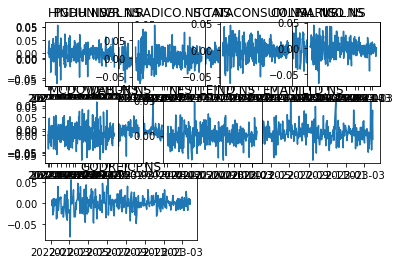

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(331)
ax7 = fig.add_subplot(332)
ax8 = fig.add_subplot(333)
ax9 = fig.add_subplot(334)
ax10 = fig.add_subplot(335)
ax11 = fig.add_subplot(341)
ax12 = fig.add_subplot(342)
ax13 = fig.add_subplot(343)
ax14 = fig.add_subplot(344)
ax15 = fig.add_subplot(345)
ax1.plot(data['rate of returns']).index
ax1.set_title("BRITANNIA.NS")
ax2.plot(data1['rate of returns']).index
ax2.set_title("COLPAL.NS")
ax3.plot(data2['rate of returns']).index
ax3.set_title("DABUR.NS")
ax4.plot(data3['rate of returns']).index
ax4.set_title("EMAMILTD.NS")
ax5.plot(data4['rate of returns']).index
ax5.set_title("GODREJCP.NS")
ax6.plot(data5['rate of returns']).index
ax6.set_title("HINDUNILVR.NS")
ax7.plot(data6['rate of returns']).index
ax7.set_title("ITC.NS")
ax8.plot(data7['rate of returns']).index
ax8.set_title("MARICO.NS")
ax9.plot(data8['rate of returns']).index
ax9.set_title("MCDOWELL-NS")
ax10.plot(data9['rate of returns']).index
ax10.set_title("NESTLEIND.NS")
ax11.plot(data10['rate of returns']).index
ax11.set_title("PGHH.NS")
ax12.plot(data11['rate of returns']).index
ax12.set_title("RADICO.NS")
ax13.plot(data12['rate of returns']).index
ax13.set_title("TATACONSUM.NS")
ax14.plot(data13['rate of returns']).index
ax14.set_title("UBL.NS")
ax15.plot(data14['rate of returns']).index
ax1.set_title("VBL.NS")
plt.tight_layout()
plt.show()

In [30]:
fig = plt.figure(5,10)
fig.plot(data['rate of returns']).index

TypeError: Value after * must be an iterable, not int

# stationarity test

In [30]:
data=data['rate of returns']

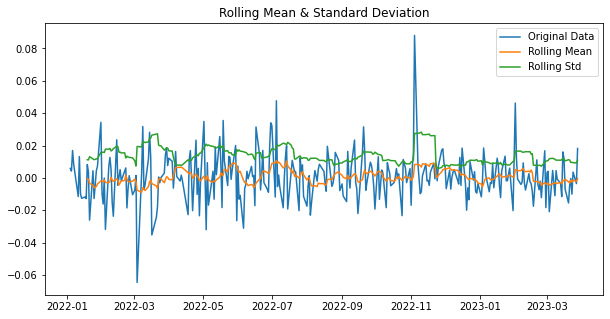

ADF Statistic: -16.642281017758606
p-value: 1.6307347337224114e-29
Critical Values:
	1%: -3.4519023023726696
	5%: -2.8710320399170537
	10%: -2.57182745012602
The data is stationary


In [31]:
def check_stationarity(data):
    # Calculate rolling mean and standard deviation
    rolmean = data.rolling(window=12).mean()
    rolstd = data.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data)

In [32]:
data1=data1['rate of returns']

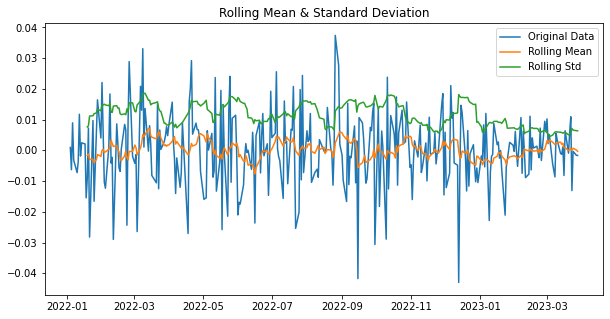

ADF Statistic: -7.79481574513898
p-value: 7.768340458209405e-12
Critical Values:
	1%: -3.4523371197407404
	5%: -2.871222860740741
	10%: -2.571929211111111
The data is stationary


In [33]:
def check_stationarity(data1):
    # Calculate rolling mean and standard deviation
    rolmean = data1.rolling(window=12).mean()
    rolstd = data1.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data1, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data1)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data1)

In [34]:
data2=data2['rate of returns']

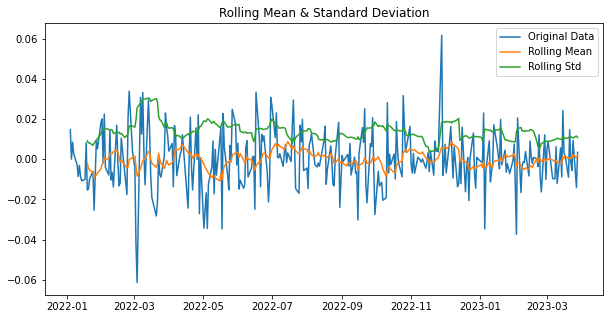

ADF Statistic: -16.74202333364149
p-value: 1.3557651071410673e-29
Critical Values:
	1%: -3.4519023023726696
	5%: -2.8710320399170537
	10%: -2.57182745012602
The data is stationary


In [35]:
def check_stationarity(data2):
    # Calculate rolling mean and standard deviation
    rolmean = data2.rolling(window=12).mean()
    rolstd = data2.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data2, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data2)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data2)

In [36]:
data3=data3['rate of returns']

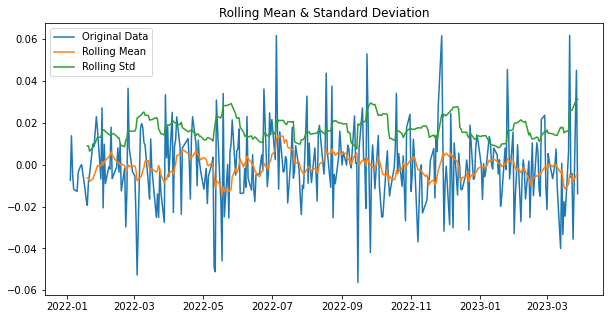

ADF Statistic: -17.885888091296067
p-value: 2.990282458032661e-30
Critical Values:
	1%: -3.4519023023726696
	5%: -2.8710320399170537
	10%: -2.57182745012602
The data is stationary


In [37]:
def check_stationarity(data3):
    # Calculate rolling mean and standard deviation
    rolmean = data3.rolling(window=12).mean()
    rolstd = data3.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data3, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data3)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data3)

In [38]:
data4=data4['rate of returns']

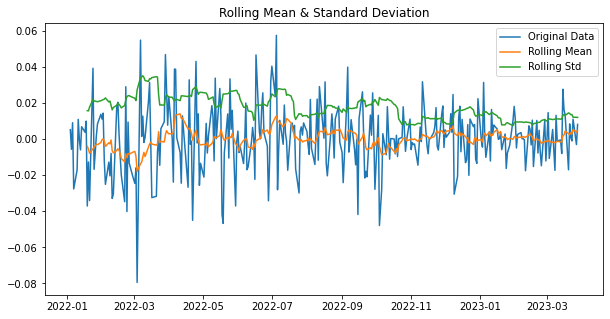

ADF Statistic: -11.258620751292966
p-value: 1.643156859410546e-20
Critical Values:
	1%: -3.452045317832011
	5%: -2.871094805558846
	10%: -2.571860921485457
The data is stationary


In [39]:
def check_stationarity(data4):
    # Calculate rolling mean and standard deviation
    rolmean = data4.rolling(window=12).mean()
    rolstd = data4.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data4, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data4)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data4)

In [40]:
data5=data5['rate of returns']

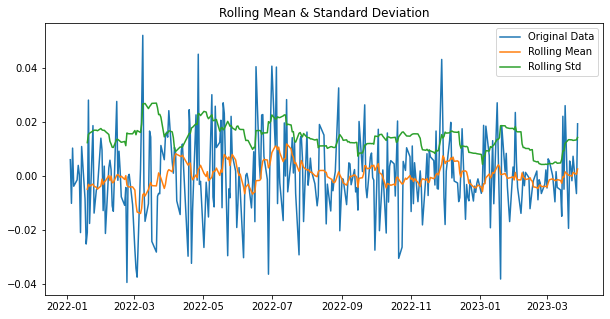

ADF Statistic: -17.064146282201232
p-value: 7.908268778835259e-30
Critical Values:
	1%: -3.4519023023726696
	5%: -2.8710320399170537
	10%: -2.57182745012602
The data is stationary


In [41]:
def check_stationarity(data5):
    # Calculate rolling mean and standard deviation
    rolmean = data5.rolling(window=12).mean()
    rolstd = data5.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data5, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data5)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data5)

In [42]:
data6=data6['rate of returns']

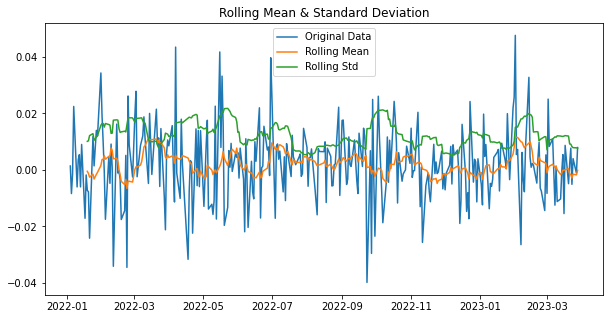

ADF Statistic: -18.004421205543498
p-value: 2.7275145525741643e-30
Critical Values:
	1%: -3.4519023023726696
	5%: -2.8710320399170537
	10%: -2.57182745012602
The data is stationary


In [43]:
def check_stationarity(data6):
    # Calculate rolling mean and standard deviation
    rolmean = data6.rolling(window=12).mean()
    rolstd = data6.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data6, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data6)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data6)

In [44]:
data7=data7['rate of returns']

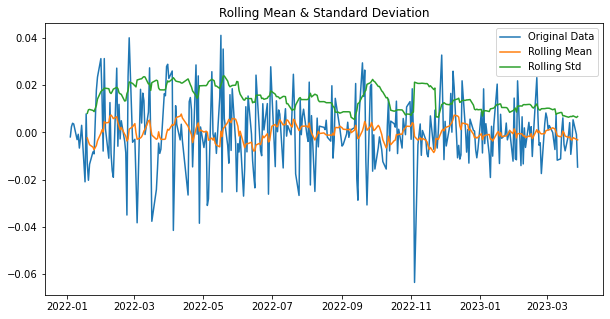

ADF Statistic: -8.201688384107431
p-value: 7.20221292669108e-13
Critical Values:
	1%: -3.4523371197407404
	5%: -2.871222860740741
	10%: -2.571929211111111
The data is stationary


In [45]:
def check_stationarity(data7):
    # Calculate rolling mean and standard deviation
    rolmean = data7.rolling(window=12).mean()
    rolstd = data7.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data7, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data7)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data7)

In [46]:
data8=data8['rate of returns']

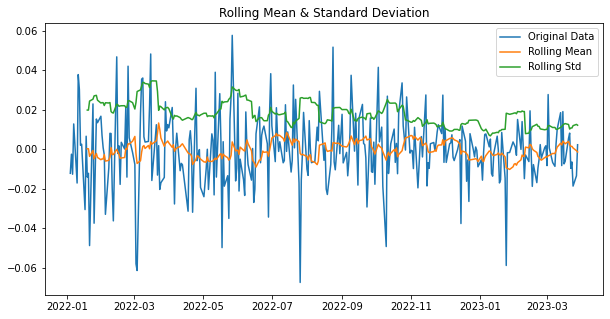

ADF Statistic: -10.214905381747789
p-value: 5.514166241323386e-18
Critical Values:
	1%: -3.4521175397304784
	5%: -2.8711265007266666
	10%: -2.571877823851692
The data is stationary


In [47]:
def check_stationarity(data8):
    # Calculate rolling mean and standard deviation
    rolmean = data8.rolling(window=12).mean()
    rolstd = data8.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data8, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data8)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data8)

In [48]:
data9=data9['rate of returns']

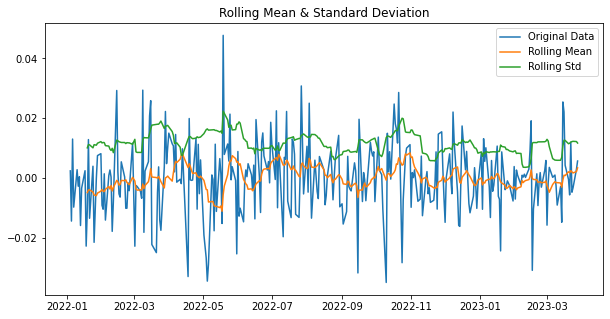

ADF Statistic: -16.982175479129232
p-value: 8.995588422239183e-30
Critical Values:
	1%: -3.4519023023726696
	5%: -2.8710320399170537
	10%: -2.57182745012602
The data is stationary


In [49]:
def check_stationarity(data9):
    # Calculate rolling mean and standard deviation
    rolmean = data9.rolling(window=12).mean()
    rolstd = data9.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data9, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data9)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data9)

In [50]:
data10=data10['rate of returns']

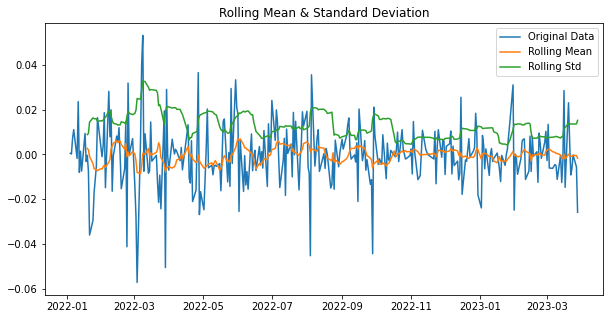

ADF Statistic: -11.203957880533618
p-value: 2.2083858928096753e-20
Critical Values:
	1%: -3.452045317832011
	5%: -2.871094805558846
	10%: -2.571860921485457
The data is stationary


In [51]:
def check_stationarity(data10):
    # Calculate rolling mean and standard deviation
    rolmean = data10.rolling(window=12).mean()
    rolstd = data10.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data10, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data10)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data10)

In [52]:
data11=data11['rate of returns']

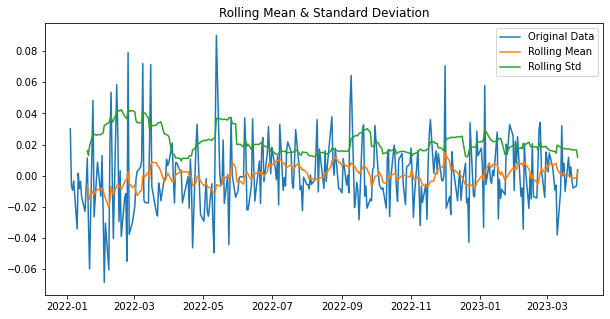

ADF Statistic: -13.578416227186166
p-value: 2.1471451377118067e-25
Critical Values:
	1%: -3.451973573620699
	5%: -2.8710633193086648
	10%: -2.5718441306100512
The data is stationary


In [53]:
def check_stationarity(data11):
    # Calculate rolling mean and standard deviation
    rolmean = data11.rolling(window=12).mean()
    rolstd = data11.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data11, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data11)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data11)

In [54]:
data12=data12['rate of returns']

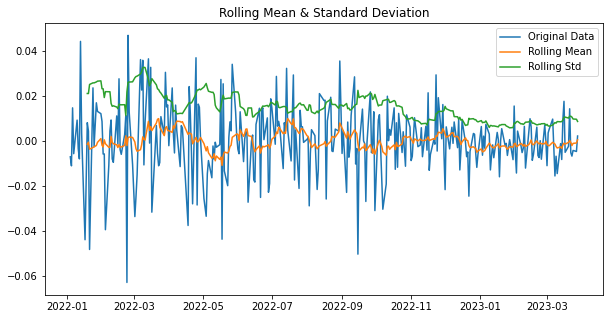

ADF Statistic: -19.200964585175267
p-value: 0.0
Critical Values:
	1%: -3.4519023023726696
	5%: -2.8710320399170537
	10%: -2.57182745012602
The data is stationary


In [55]:
def check_stationarity(data12):
    # Calculate rolling mean and standard deviation
    rolmean = data12.rolling(window=12).mean()
    rolstd = data12.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data12, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data12)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data12)

In [56]:
data13=data13['rate of returns']

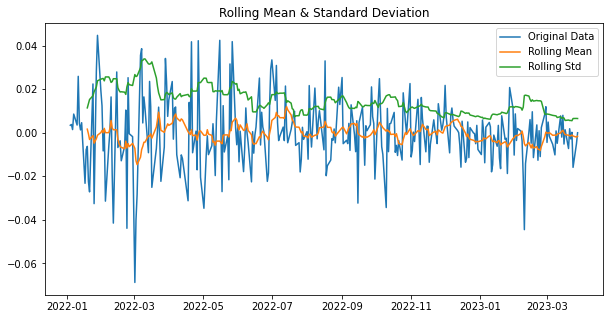

ADF Statistic: -10.66584836251816
p-value: 4.2895022855851356e-19
Critical Values:
	1%: -3.452045317832011
	5%: -2.871094805558846
	10%: -2.571860921485457
The data is stationary


In [57]:
def check_stationarity(data13):
    # Calculate rolling mean and standard deviation
    rolmean = data13.rolling(window=12).mean()
    rolstd = data13.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data13, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data13)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data13)

In [58]:
data14=data14['rate of returns']

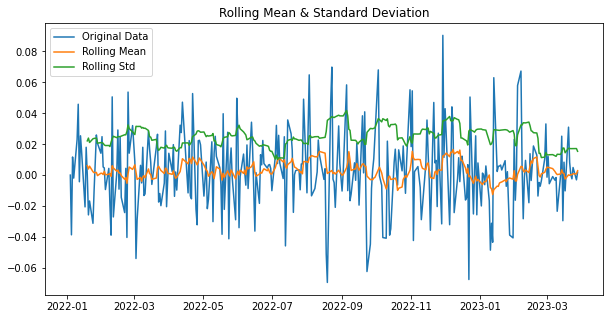

ADF Statistic: -8.84583037153432
p-value: 1.6217664560922248e-14
Critical Values:
	1%: -3.4523371197407404
	5%: -2.871222860740741
	10%: -2.571929211111111
The data is stationary


In [59]:
def check_stationarity(data14):
    # Calculate rolling mean and standard deviation
    rolmean = data14.rolling(window=12).mean()
    rolstd = data14.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 5))
    plt.plot(data14, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data14)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
    
    # Check if the data is stationary or not
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is not stationary')
    
check_stationarity(data14)

# ACF AND PACF

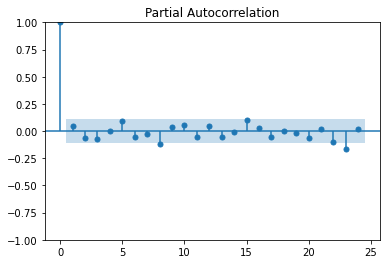

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data, lags= 24, alpha= 0.05)
plt.show()

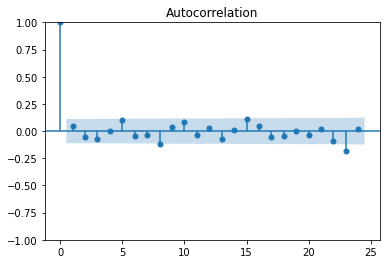

In [61]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data, lags= 24, alpha= 0.05)
plt.show()

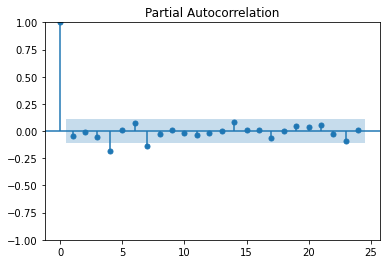

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data1, lags= 24, alpha= 0.05)
plt.show()

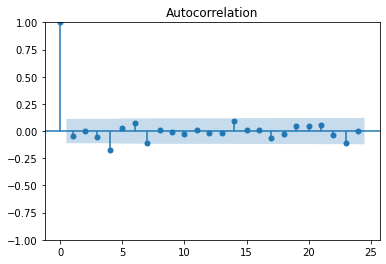

In [63]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data1, lags= 24, alpha= 0.05)
plt.show()

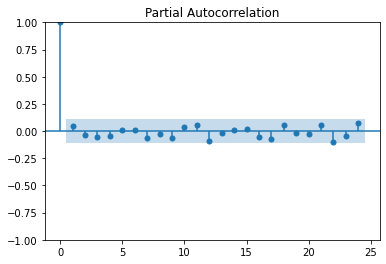

In [64]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data2, lags= 24, alpha= 0.05)
plt.show()

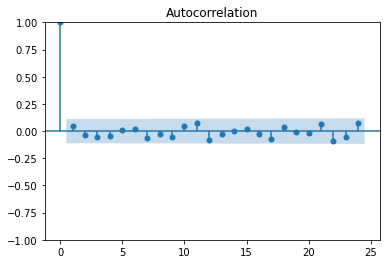

In [65]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data2, lags= 24, alpha= 0.05)
plt.show()

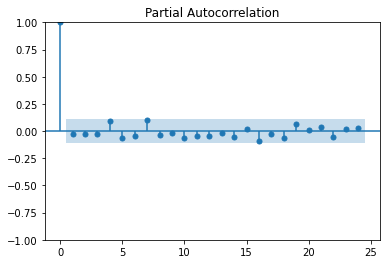

In [66]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data3, lags= 24, alpha= 0.05)
plt.show()

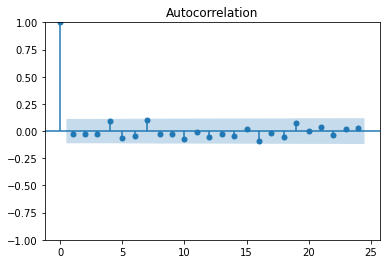

In [67]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data3, lags= 24, alpha= 0.05)
plt.show()

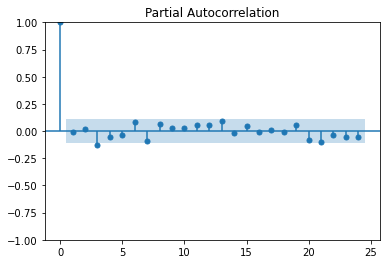

In [68]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data4, lags= 24, alpha= 0.05)
plt.show()

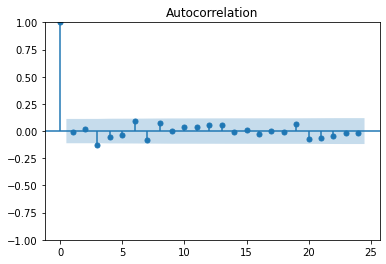

In [69]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data4, lags= 24, alpha= 0.05)
plt.show()

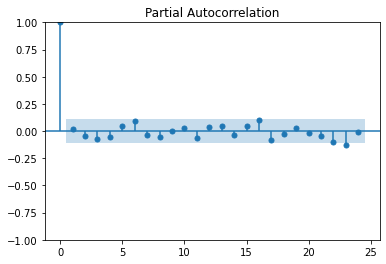

In [70]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data5, lags= 24, alpha= 0.05)
plt.show()

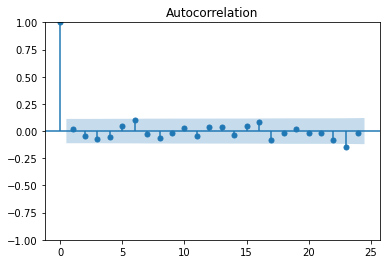

In [71]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data5, lags= 24, alpha= 0.05)
plt.show()

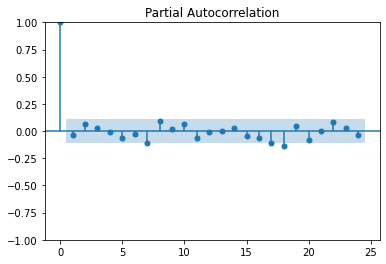

In [72]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data6, lags= 24, alpha= 0.05)
plt.show()

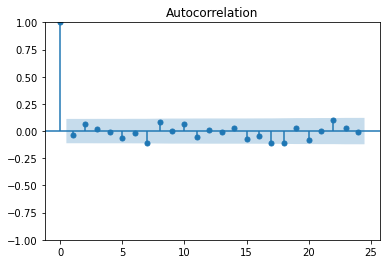

In [73]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data6, lags= 24, alpha= 0.05)
plt.show()

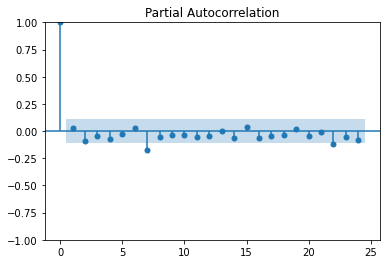

In [74]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data7, lags= 24, alpha= 0.05)
plt.show()

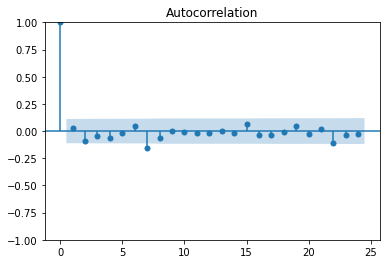

In [75]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data7, lags= 24, alpha= 0.05)
plt.show()

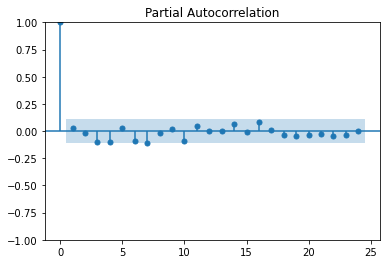

In [76]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data8, lags= 24, alpha= 0.05)
plt.show()

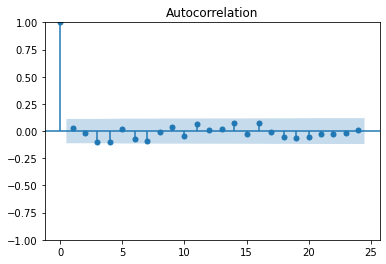

In [77]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data8, lags= 24, alpha= 0.05)
plt.show()

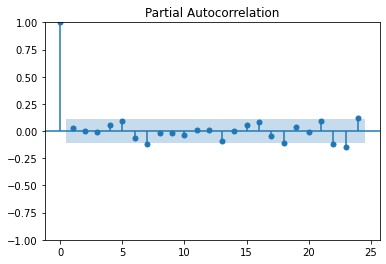

In [78]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data9, lags= 24, alpha= 0.05)
plt.show()

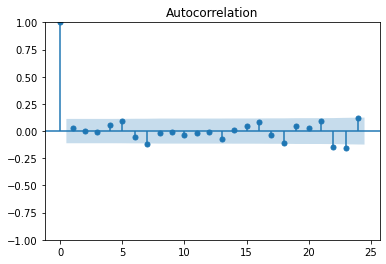

In [79]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data9, lags= 24, alpha= 0.05)
plt.show()

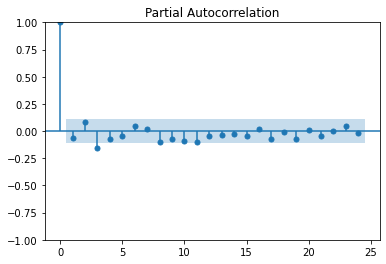

In [80]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data10, lags= 24, alpha= 0.05)
plt.show()

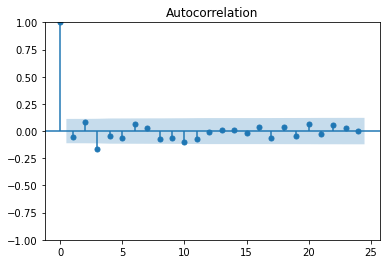

In [81]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data10, lags= 24, alpha= 0.05)
plt.show()

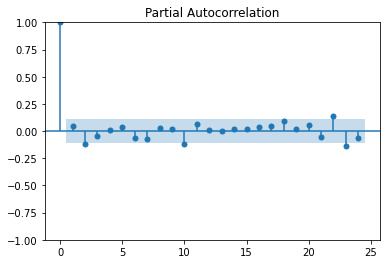

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data11, lags= 24, alpha= 0.05)
plt.show()

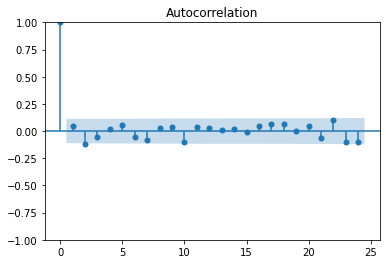

In [83]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data11, lags= 24, alpha= 0.05)
plt.show()

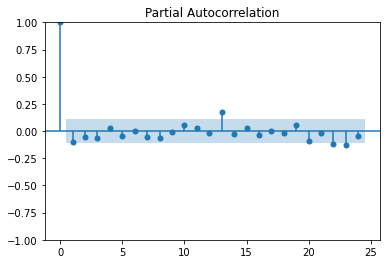

In [84]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data12, lags= 24, alpha= 0.05)
plt.show()

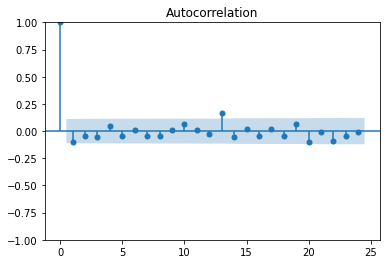

In [85]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data12, lags= 24, alpha= 0.05)
plt.show()

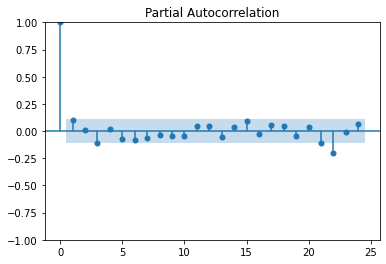

In [86]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data13, lags= 24, alpha= 0.05)
plt.show()

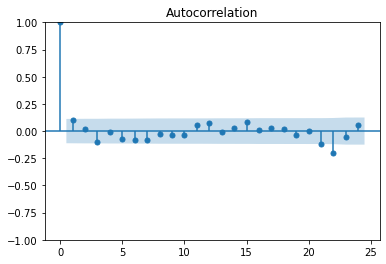

In [87]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data13, lags= 24, alpha= 0.05)
plt.show()

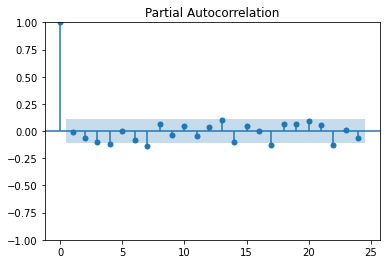

In [88]:
from statsmodels.graphics.tsaplots import plot_pacf
tsp.plot_pacf(x=data14, lags= 24, alpha= 0.05)
plt.show()

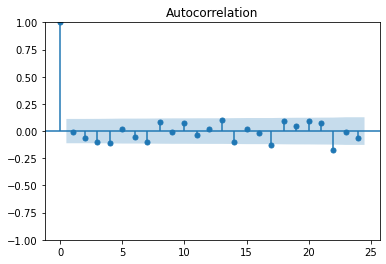

In [89]:
import statsmodels.graphics.tsaplots as tsp
tsp.plot_acf(x=data14, lags= 24, alpha= 0.05)
plt.show()

# ARIMA model using fit

In [30]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 859.439
Date:                Mon, 01 May 2023   AIC                          -1710.878
Time:                        23:04:33   BIC                          -1695.984
Sample:                             0   HQIC                         -1704.922
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8246      0.287     -2.872      0.004      -1.387      -0.262
ma.L1         -0.1337      0.251     -0.532      0.595      -0.626       0.359
ma.L2         -0.8555      0.245     -3.489      0.000      -1.336      -0.375
sigma2         0.0002   9.05e-06     23.167      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               344.35
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.72
Prob(H) (two-sided):                  0.06   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

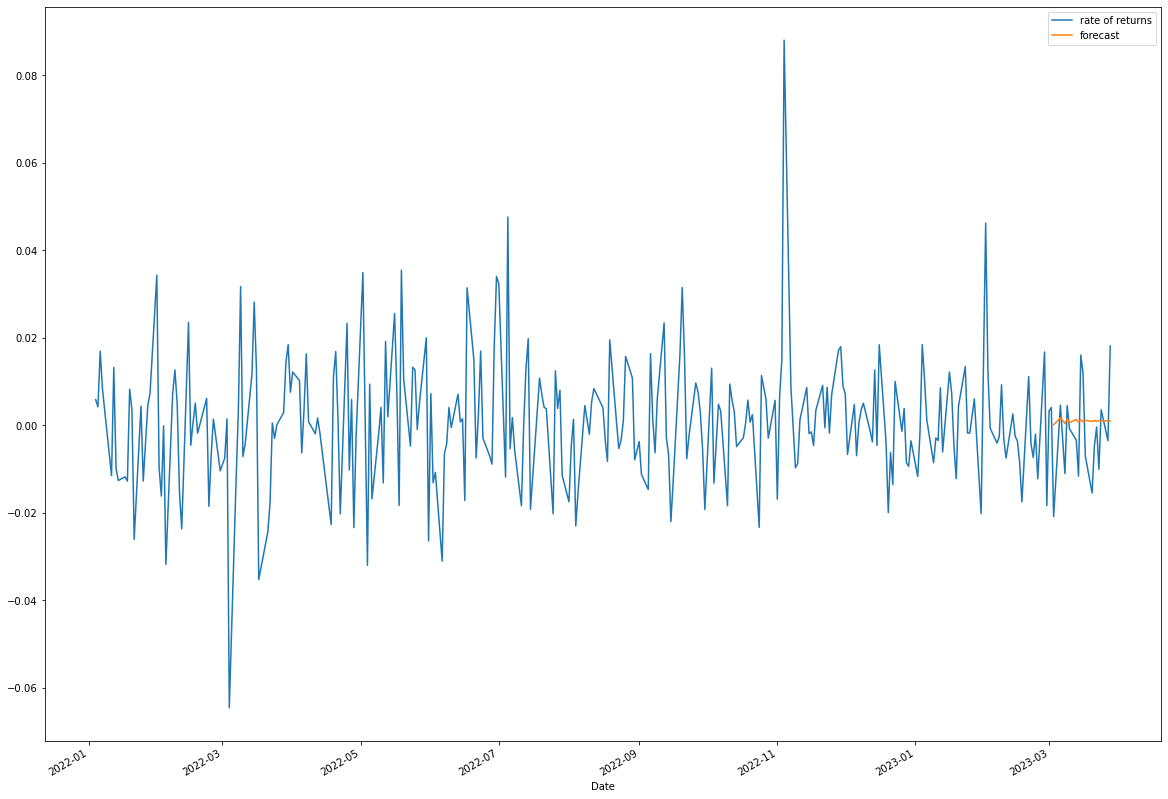

In [31]:
data['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data[['rate of returns','forecast']].plot(figsize=(20,15))

In [32]:
model=ARIMA(data1['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 921.270
Date:                Mon, 01 May 2023   AIC                          -1834.539
Time:                        23:04:37   BIC                          -1819.645
Sample:                             0   HQIC                         -1828.582
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9757      0.049    -19.973      0.000      -1.071      -0.880
ma.L1         -0.0397      0.521     -0.076      0.939      -1.060       0.981
ma.L2         -0.9597      0.501     -1.914      0.056      -1.943       0.023
sigma2         0.0001   7.08e-05      1.962      0.050    1.31e-07       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                16.73
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

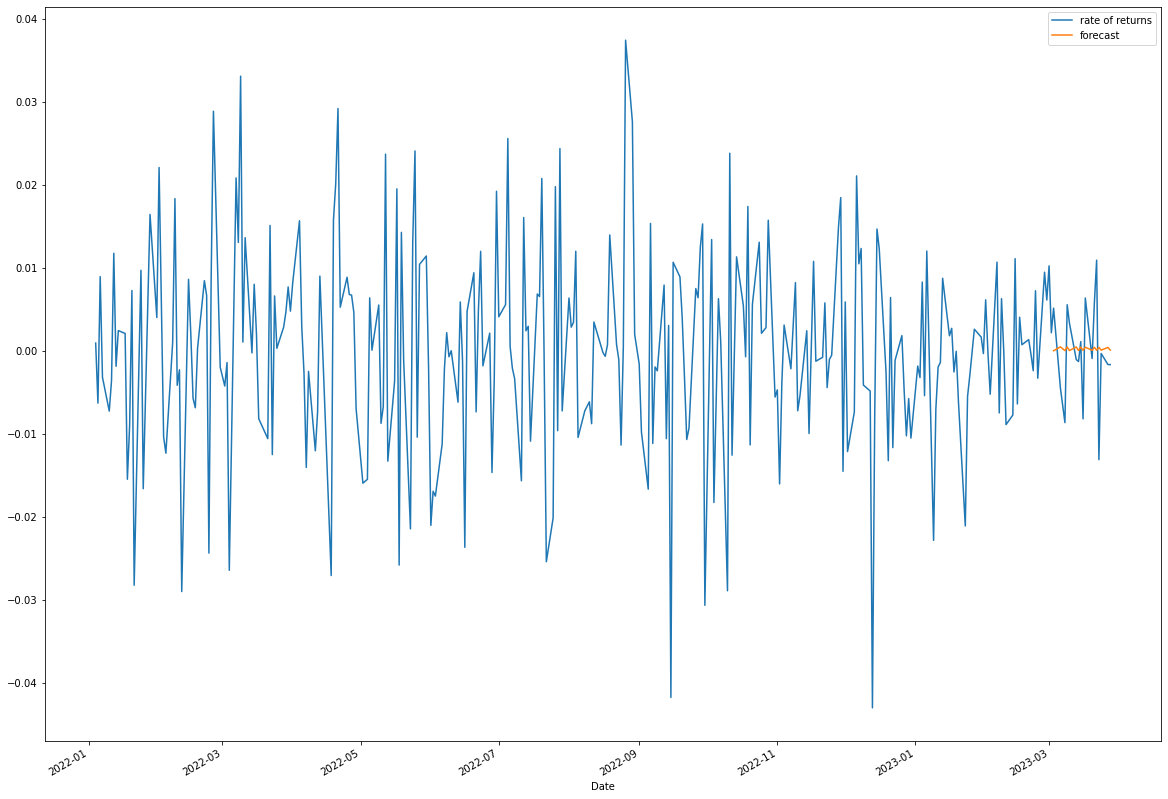

In [33]:
data1['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data1[['rate of returns','forecast']].plot(figsize=(20,15))

In [34]:
print(data['forecast'])

Date
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
2022-01-07         NaN
2022-01-10         NaN
                ...   
2023-03-22    0.000908
2023-03-23    0.001068
2023-03-24    0.000936
2023-03-27    0.001045
2023-03-28    0.000955
Name: forecast, Length: 307, dtype: float64


In [35]:
model=ARIMA(data2['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 861.692
Date:                Mon, 01 May 2023   AIC                          -1715.384
Time:                        23:04:38   BIC                          -1700.489
Sample:                             0   HQIC                         -1709.427
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8939      0.554     -1.613      0.107      -1.980       0.192
ma.L1         -0.0953      0.550     -0.173      0.862      -1.173       0.983
ma.L2         -0.9002      0.522     -1.725      0.085      -1.923       0.123
sigma2         0.0002   1.68e-05     12.293      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                36.29
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

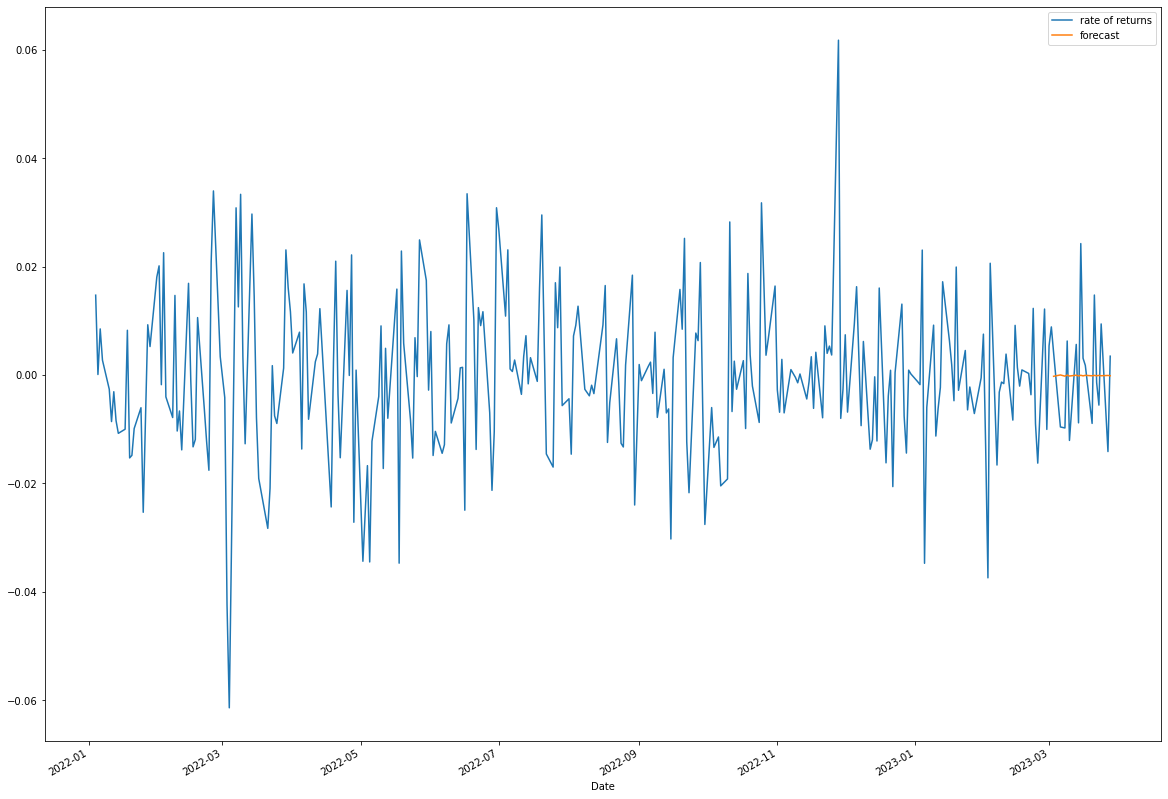

In [36]:
data2['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data2[['rate of returns','forecast']].plot(figsize=(20,15))

In [37]:
model=ARIMA(data3['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 791.995
Date:                Mon, 01 May 2023   AIC                          -1575.990
Time:                        23:04:39   BIC                          -1561.095
Sample:                             0   HQIC                         -1570.033
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9418      0.166     -5.671      0.000      -1.267      -0.616
ma.L1         -0.0457      0.252     -0.181      0.856      -0.540       0.449
ma.L2         -0.9533      0.218     -4.369      0.000      -1.381      -0.526
sigma2         0.0003    6.5e-05      4.989      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                27.13
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.25
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

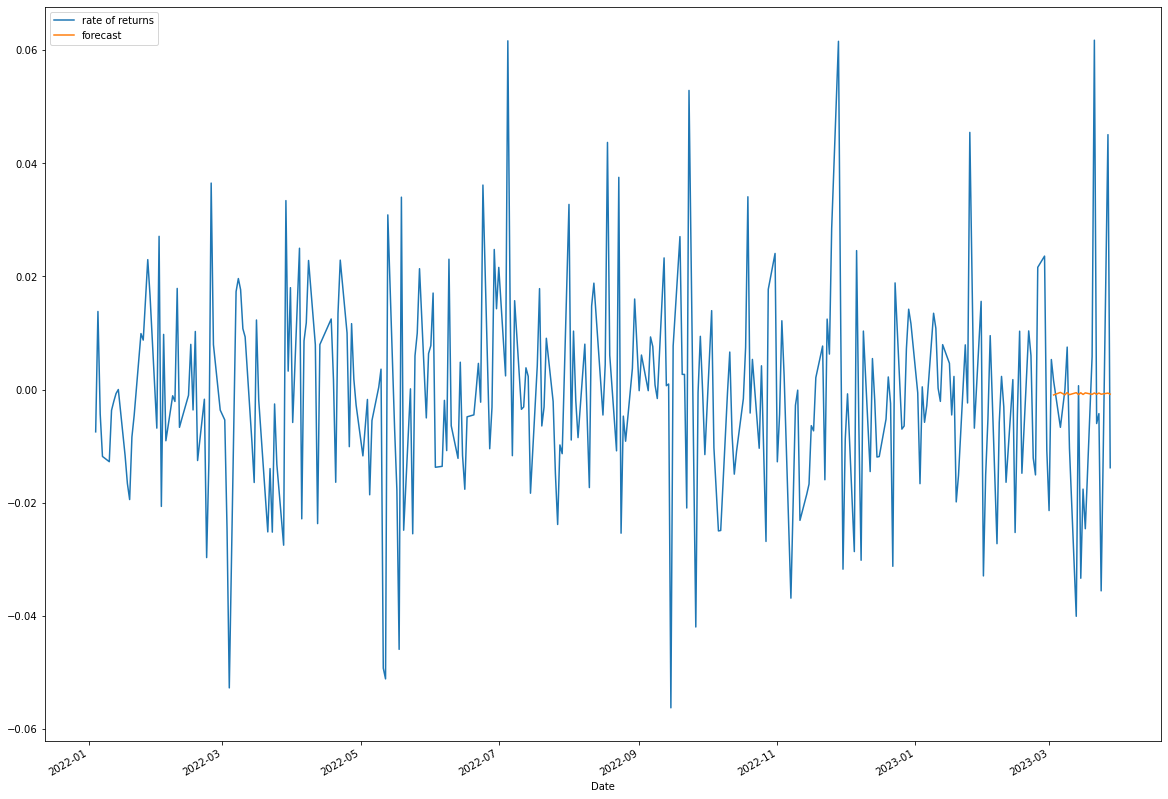

In [38]:
data3['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data3[['rate of returns','forecast']].plot(figsize=(20,15))

In [39]:
model=ARIMA(data4['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 790.104
Date:                Mon, 01 May 2023   AIC                          -1572.208
Time:                        23:04:40   BIC                          -1557.314
Sample:                             0   HQIC                         -1566.252
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9929      0.011    -87.213      0.000      -1.015      -0.971
ma.L1         -0.0215      1.658     -0.013      0.990      -3.272       3.229
ma.L2         -0.9784      1.624     -0.603      0.547      -4.161       2.204
sigma2         0.0003      0.001      0.605      0.545      -0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                13.41
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

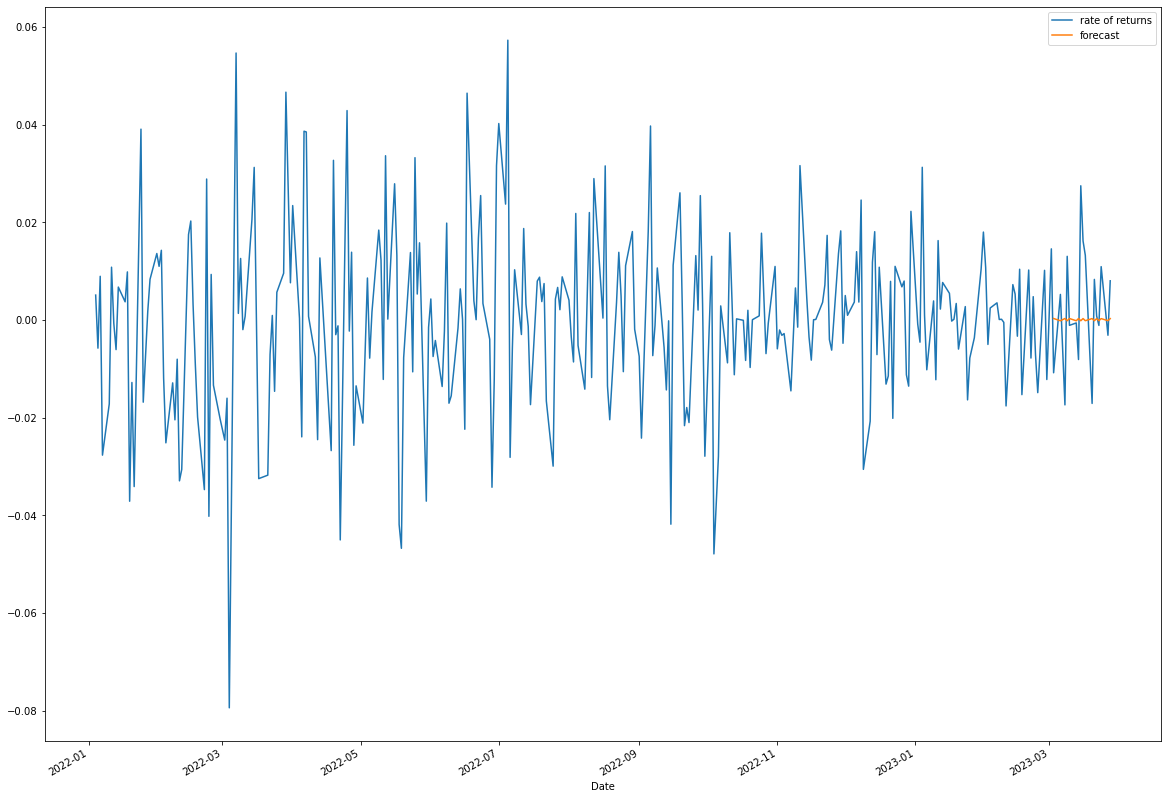

In [40]:
data4['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data4[['rate of returns','forecast']].plot(figsize=(20,15))

In [41]:
model=ARIMA(data5['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 849.978
Date:                Mon, 01 May 2023   AIC                          -1691.956
Time:                        23:04:41   BIC                          -1677.062
Sample:                             0   HQIC                         -1685.999
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9911      0.024    -42.102      0.000      -1.037      -0.945
ma.L1         -0.0182      1.459     -0.012      0.990      -2.877       2.841
ma.L2         -0.9817      1.437     -0.683      0.495      -3.798       1.835
sigma2         0.0002      0.000      0.689      0.491      -0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                10.21
Prob(Q):                              0.57   Prob(JB):                         0.01
Heteroskedasticity (H):               0.45   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

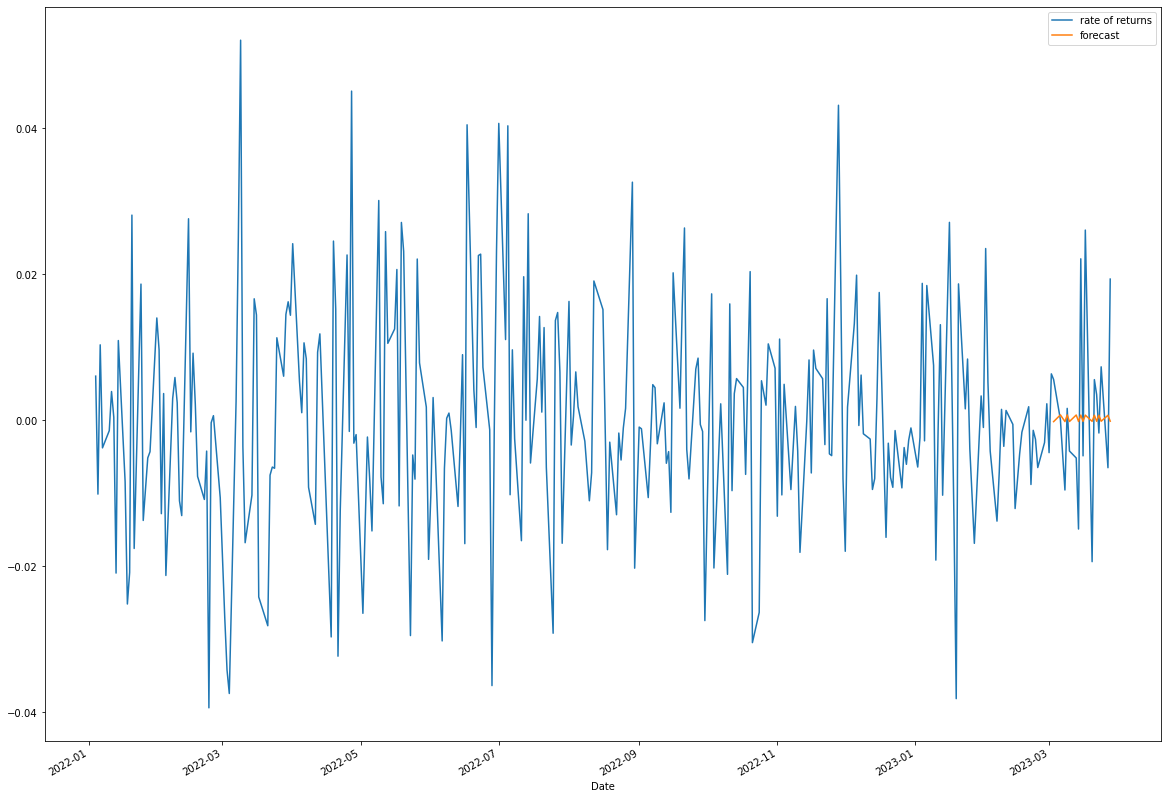

In [42]:
data5['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data5[['rate of returns','forecast']].plot(figsize=(20,15))

In [43]:
model=ARIMA(data6['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 894.148
Date:                Mon, 01 May 2023   AIC                          -1780.295
Time:                        23:04:42   BIC                          -1765.401
Sample:                             0   HQIC                         -1774.339
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9338      0.106     -8.785      0.000      -1.142      -0.726
ma.L1         -0.0968      0.138     -0.703      0.482      -0.367       0.173
ma.L2         -0.8997      0.141     -6.381      0.000      -1.176      -0.623
sigma2         0.0002   1.63e-05     10.248      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                13.00
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             0.10
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

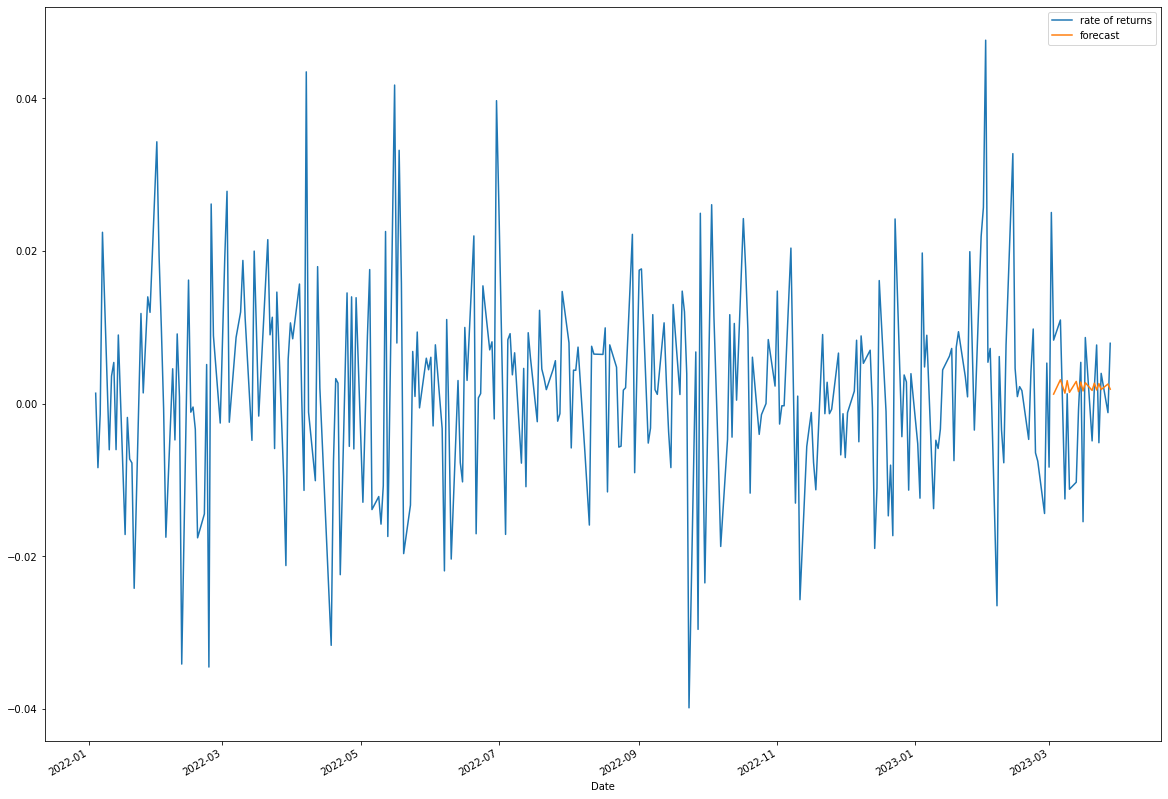

In [44]:
data6['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data6[['rate of returns','forecast']].plot(figsize=(20,15))

In [45]:
model=ARIMA(data7['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 854.248
Date:                Mon, 01 May 2023   AIC                          -1700.496
Time:                        23:04:43   BIC                          -1685.602
Sample:                             0   HQIC                         -1694.539
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9775      0.021    -46.978      0.000      -1.018      -0.937
ma.L1         -0.0001      0.758     -0.000      1.000      -1.486       1.486
ma.L2         -0.9999      0.758     -1.319      0.187      -2.486       0.486
sigma2         0.0002      0.000      1.360      0.174   -9.48e-05       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                15.89
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+16. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

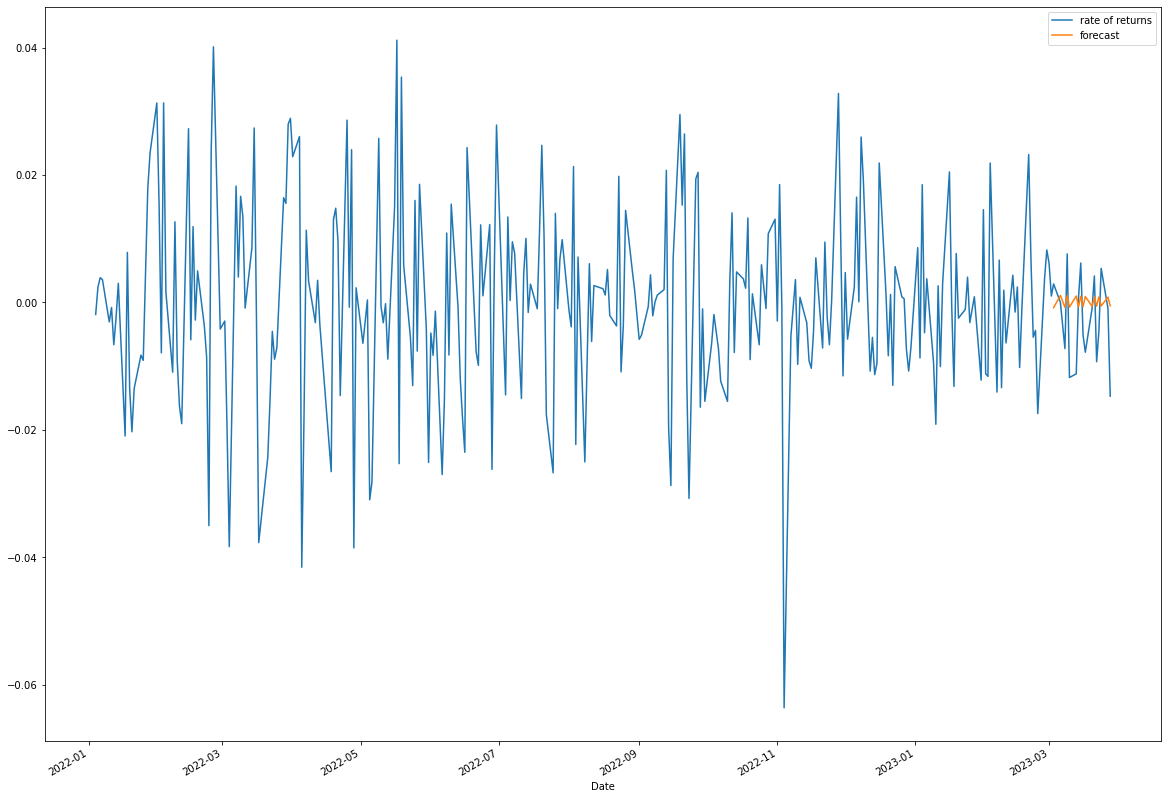

In [46]:
data7['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data7[['rate of returns','forecast']].plot(figsize=(20,15))

In [47]:
model=ARIMA(data8['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 788.183
Date:                Mon, 01 May 2023   AIC                          -1568.367
Time:                        23:04:43   BIC                          -1553.472
Sample:                             0   HQIC                         -1562.410
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9655      0.039    -24.992      0.000      -1.041      -0.890
ma.L1         -0.0154      2.051     -0.007      0.994      -4.035       4.004
ma.L2         -0.9845      2.027     -0.486      0.627      -4.958       2.989
sigma2         0.0003      0.001      0.487      0.626      -0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                27.92
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

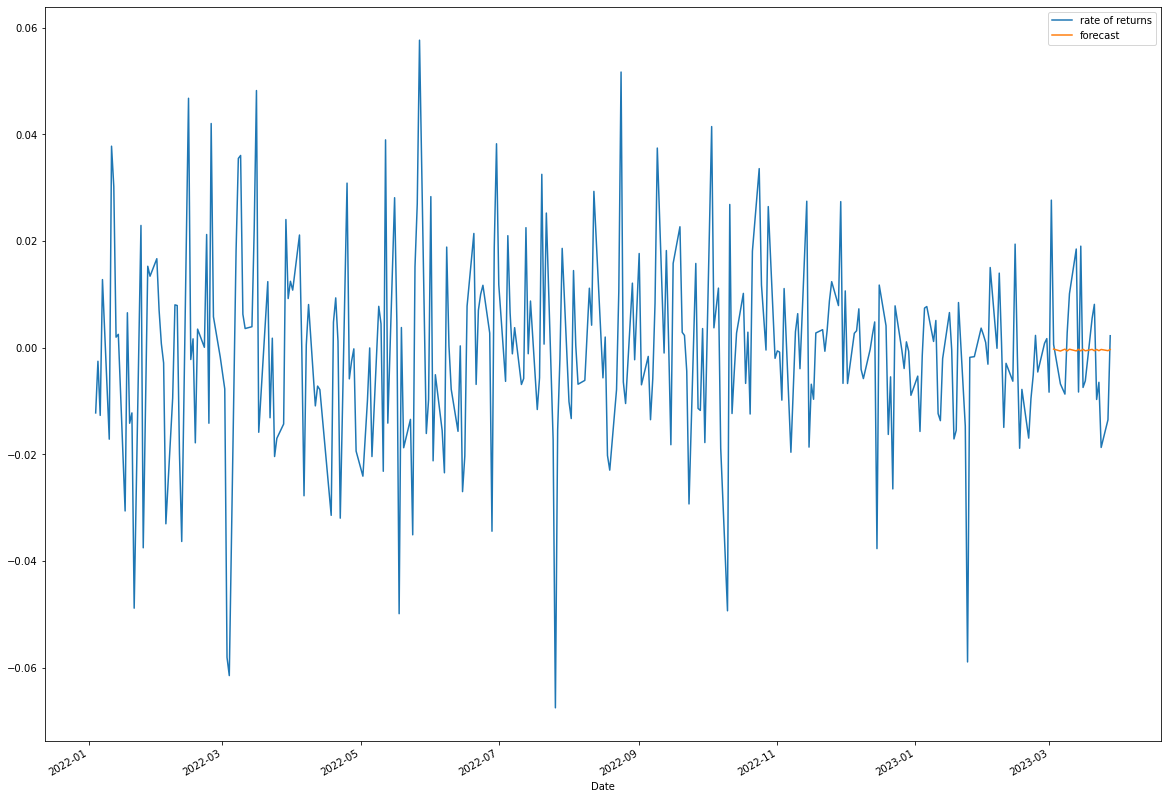

In [48]:
data8['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data8[['rate of returns','forecast']].plot(figsize=(20,15))

In [49]:
model=ARIMA(data9['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 915.768
Date:                Mon, 01 May 2023   AIC                          -1823.537
Time:                        23:04:44   BIC                          -1808.642
Sample:                             0   HQIC                         -1817.580
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9965      0.011    -87.662      0.000      -1.019      -0.974
ma.L1         -0.0097      4.869     -0.002      0.998      -9.552       9.533
ma.L2         -0.9903      4.820     -0.205      0.837     -10.437       8.457
sigma2         0.0001      0.001      0.205      0.837      -0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                16.09
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

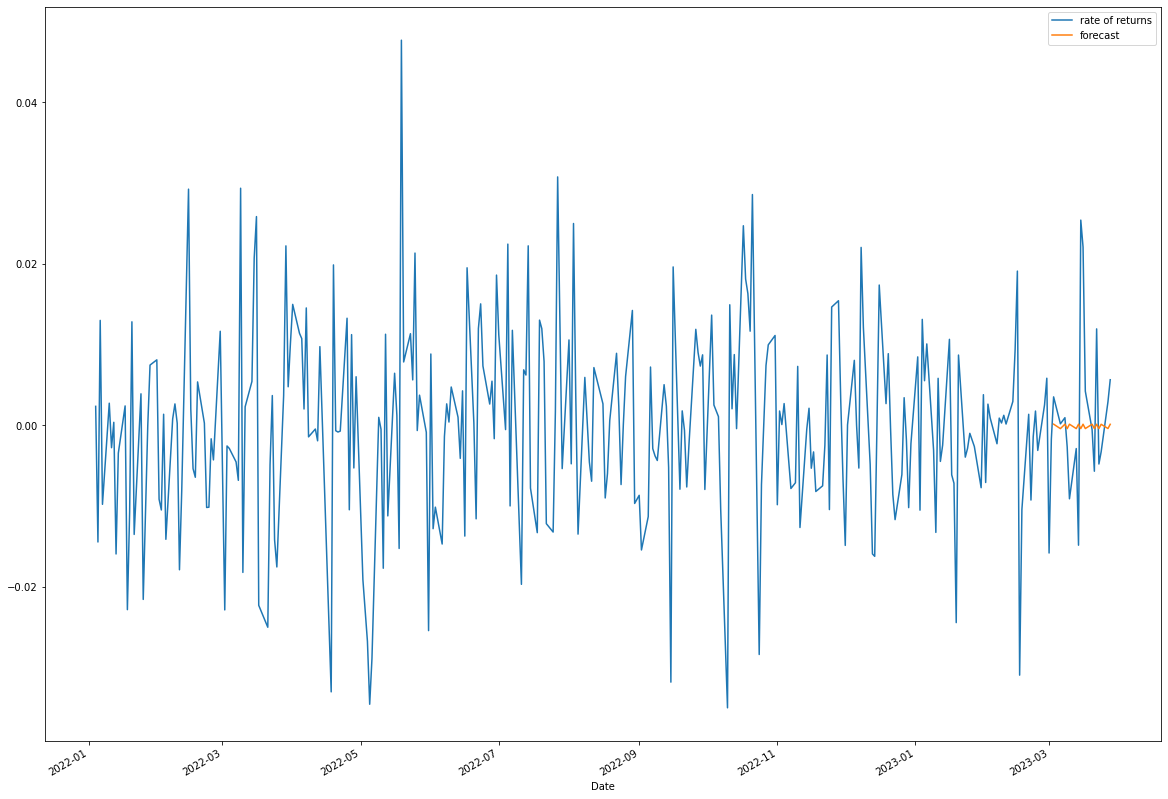

In [50]:
data9['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data9[['rate of returns','forecast']].plot(figsize=(20,15))

In [51]:
model=ARIMA(data10['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 876.277
Date:                Mon, 01 May 2023   AIC                          -1744.553
Time:                        23:04:45   BIC                          -1729.659
Sample:                             0   HQIC                         -1738.597
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9232      0.098     -9.447      0.000      -1.115      -0.732
ma.L1         -0.1178      0.126     -0.934      0.350      -0.365       0.129
ma.L2         -0.8731      0.123     -7.070      0.000      -1.115      -0.631
sigma2         0.0002    1.4e-05     13.415      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                68.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

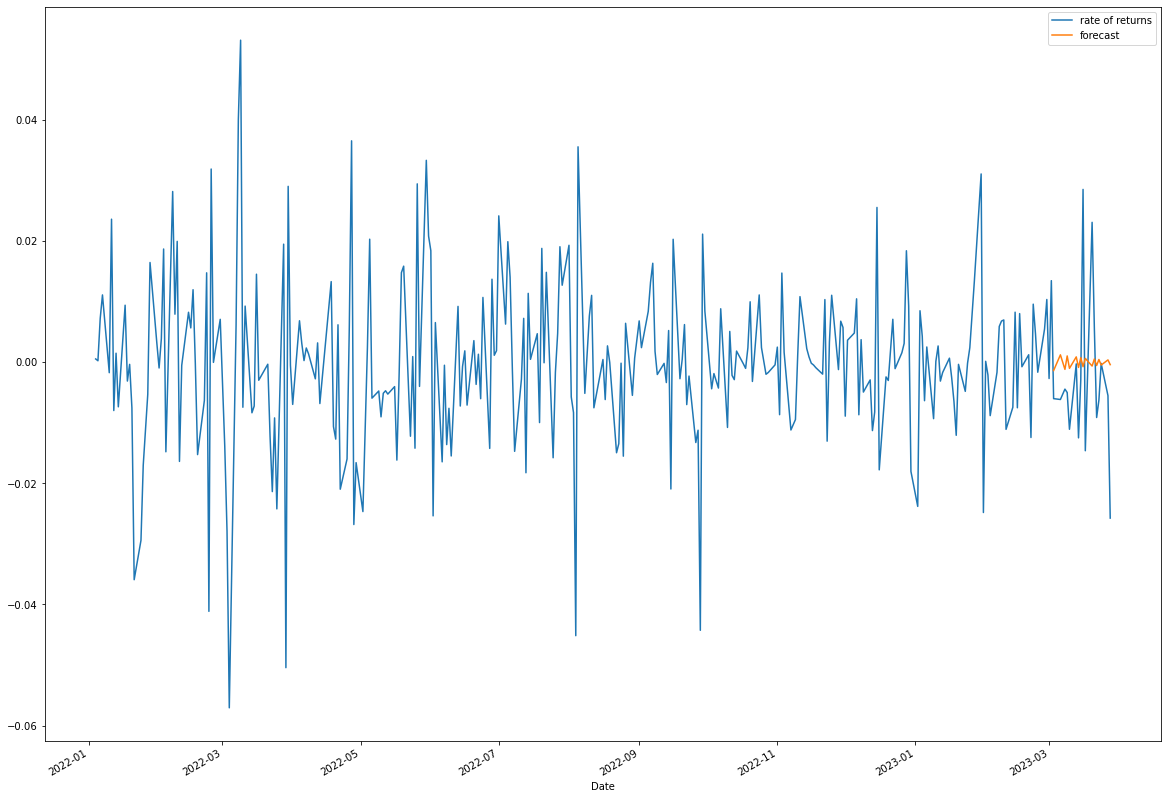

In [52]:
data10['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data10[['rate of returns','forecast']].plot(figsize=(20,15))

In [53]:
model=ARIMA(data11['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 725.682
Date:                Mon, 01 May 2023   AIC                          -1443.365
Time:                        23:04:45   BIC                          -1428.470
Sample:                             0   HQIC                         -1437.408
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7130      0.287     -2.483      0.013      -1.276      -0.150
ma.L1         -0.2178      0.263     -0.828      0.408      -0.733       0.298
ma.L2         -0.7610      0.258     -2.948      0.003      -1.267      -0.255
sigma2         0.0005   2.84e-05     17.754      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                90.37
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

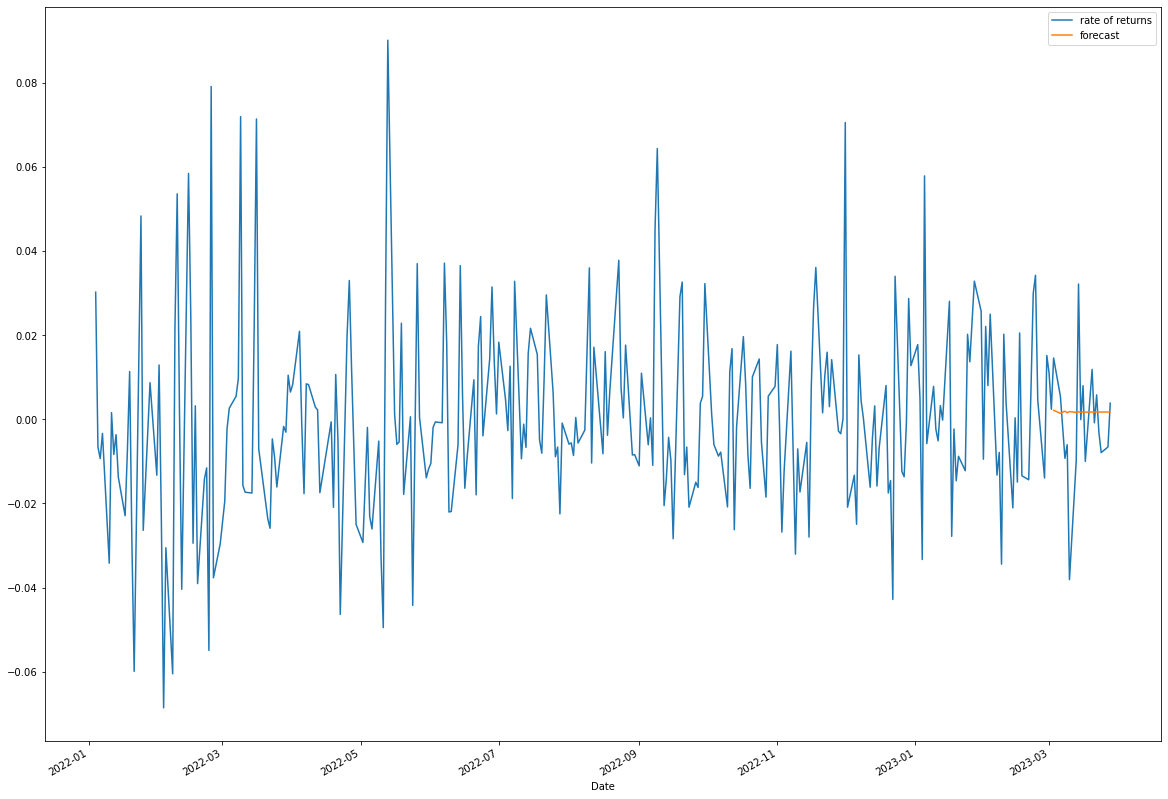

In [54]:
data11['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data11[['rate of returns','forecast']].plot(figsize=(20,15))

In [55]:
model=ARIMA(data12['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 834.524
Date:                Mon, 01 May 2023   AIC                          -1661.049
Time:                        23:04:46   BIC                          -1646.154
Sample:                             0   HQIC                         -1655.092
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8794      0.227     -3.871      0.000      -1.325      -0.434
ma.L1         -0.1408      0.251     -0.561      0.575      -0.632       0.351
ma.L2         -0.8470      0.250     -3.394      0.001      -1.336      -0.358
sigma2         0.0002   1.83e-05     13.484      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.46   Jarque-Bera (JB):                28.44
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

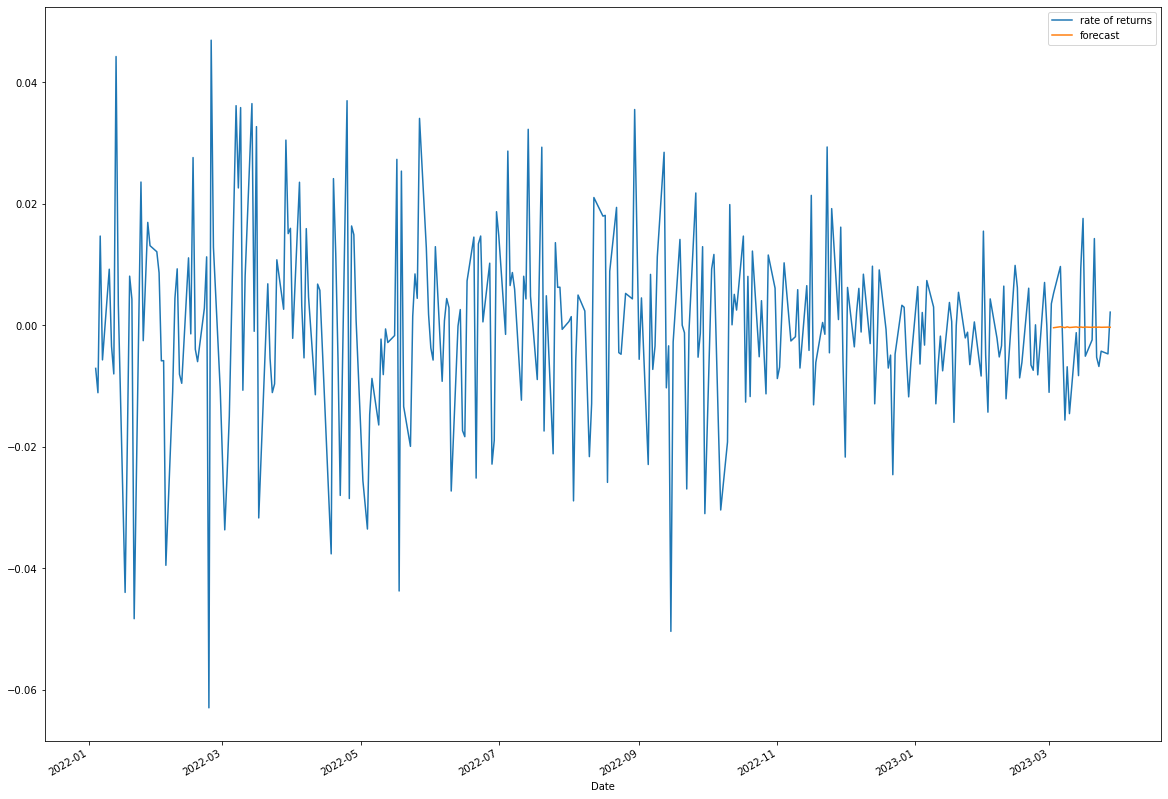

In [56]:
data12['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data12[['rate of returns','forecast']].plot(figsize=(20,15))

In [57]:
model=ARIMA(data13['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 839.117
Date:                Mon, 01 May 2023   AIC                          -1670.235
Time:                        23:04:46   BIC                          -1655.340
Sample:                             0   HQIC                         -1664.278
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9705      0.150     -6.459      0.000      -1.265      -0.676
ma.L1         -0.0361      0.572     -0.063      0.950      -1.158       1.086
ma.L2         -0.9634      0.566     -1.701      0.089      -2.074       0.147
sigma2         0.0002      0.000      1.827      0.068   -1.73e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   3.93   Jarque-Bera (JB):                35.50
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

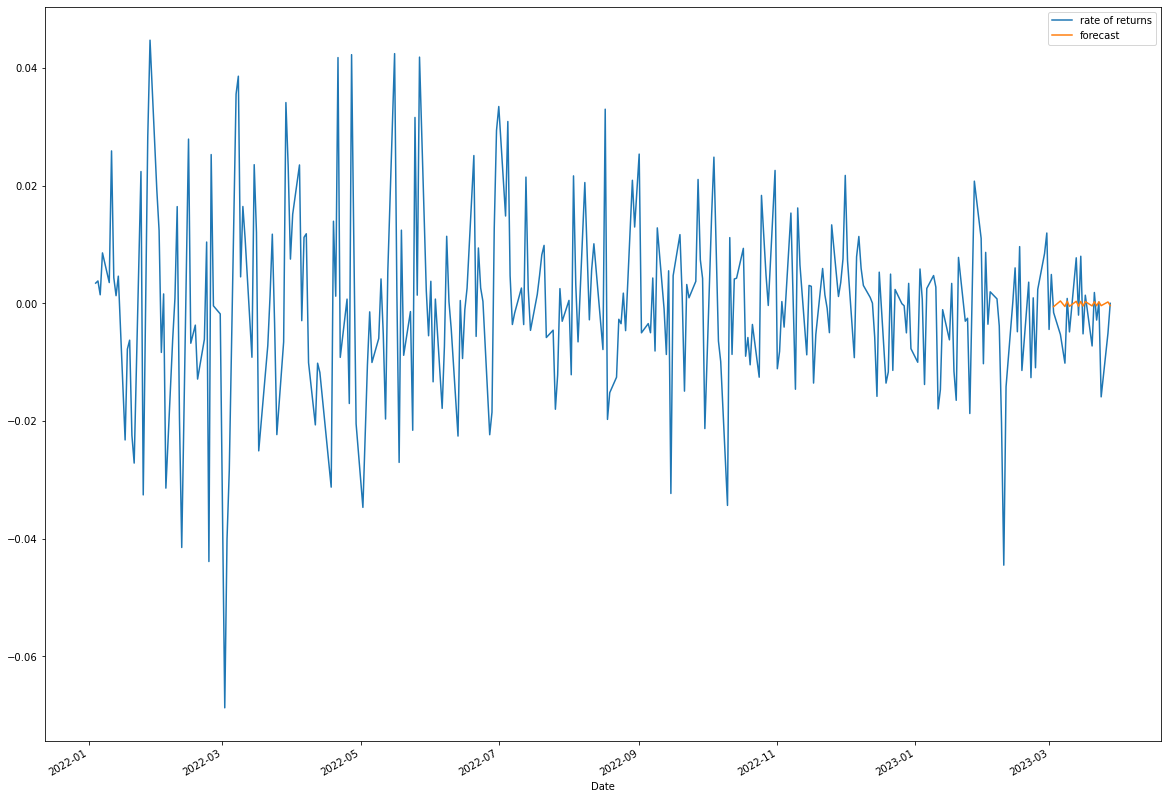

In [58]:
data13['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data13[['rate of returns','forecast']].plot(figsize=(20,15))

In [59]:
model=ARIMA(data14['rate of returns'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        rate of returns   No. Observations:                  307
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 691.067
Date:                Mon, 01 May 2023   AIC                          -1374.133
Time:                        23:04:47   BIC                          -1359.239
Sample:                             0   HQIC                         -1368.176
                                - 307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9738      0.392     -2.484      0.013      -1.742      -0.205
ma.L1         -0.0279      0.905     -0.031      0.975      -1.802       1.746
ma.L2         -0.9717      0.878     -1.107      0.268      -2.692       0.749
sigma2         0.0006      0.001      1.234      0.217      -0.000       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.74
Prob(Q):                              0.94   Prob(JB):                         0.09
Heteroskedasticity (H):               1.16   Skew:                             0.14
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

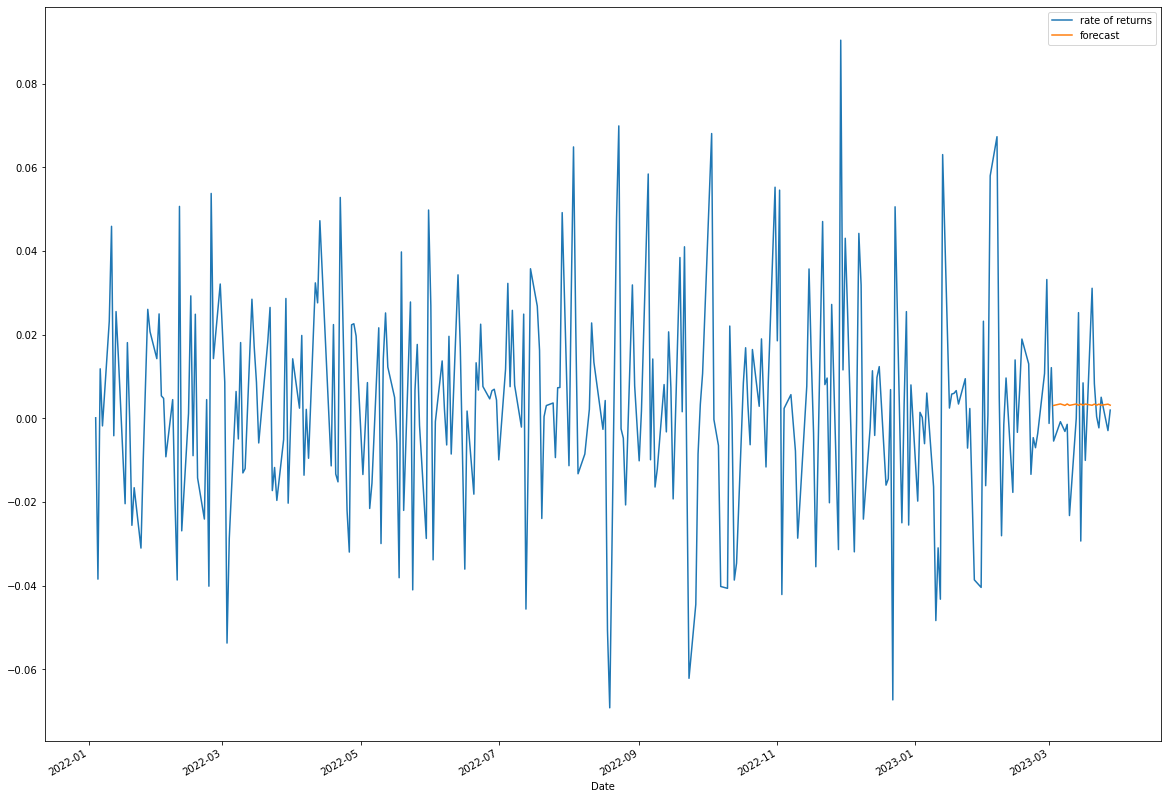

In [60]:
data14['forecast']=model_fit.predict(start=290,end=306,dynamic=True)
data14[['rate of returns','forecast']].plot(figsize=(20,15))

In [74]:
print(data[-20::],data1[-20::],data2[-20::],data3[-20::],data4[-20::],data5[-20::],data6[-20::],data7[-20::],data8[-20::],data9[-20::],data10[-20::],data11[-20::],data12[-20::],data13[-20::],data14[-20::])

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-02-28  4390.000000  4475.250000  4380.000000  4461.750000  4386.539551   
2023-03-01  4439.000000  4454.549805  4355.149902  4379.799805  4305.971191   
2023-03-02  4390.000000  4405.000000  4343.049805  4394.200195  4320.128418   
2023-03-03  4400.000000  4444.750000  4380.399902  4411.950195  4337.579590   
2023-03-06  4389.000000  4389.000000  4279.899902  4319.850098  4247.031738   
2023-03-08  4319.850098  4370.000000  4305.750000  4339.649902  4266.498047   
2023-03-09  4339.649902  4350.000000  4275.200195  4291.700195  4219.356445   
2023-03-10  4307.399902  4361.750000  4282.750000  4311.000000  4238.331055   
2023-03-13  4309.000000  4346.049805  4290.000000  4307.600098  4234.988281   
2023-03-14  4315.000000  4343.899902  4277.000000  4292.950195  4220.585449   
2023-03-15  4315.000000  4323.649902  4237.600098  4

In [64]:
print (data['forecast'],data1['forecast'],data2['forecast'],data3['forecast'],data4['forecast'],data5['forecast'],data6['forecast'],data7['forecast'],data8['forecast'],data9['forecast'],data10['forecast'],data11['forecast'],data12['forecast'],data13['forecast'],data14['forecast'])

Date
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
2022-01-07         NaN
2022-01-10         NaN
                ...   
2023-03-22    0.000908
2023-03-23    0.001068
2023-03-24    0.000936
2023-03-27    0.001045
2023-03-28    0.000955
Name: forecast, Length: 307, dtype: float64 Date
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
2022-01-07         NaN
2022-01-10         NaN
                ...   
2023-03-22    0.000063
2023-03-23    0.000407
2023-03-24    0.000071
2023-03-27    0.000399
2023-03-28    0.000079
Name: forecast, Length: 307, dtype: float64 Date
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
2022-01-07         NaN
2022-01-10         NaN
                ...   
2023-03-22   -0.000148
2023-03-23   -0.000083
2023-03-24   -0.000141
2023-03-27   -0.000089
2023-03-28   -0.000136
Name: forecast, Length: 307, dtype: float64 Date
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
2022-01-07         N

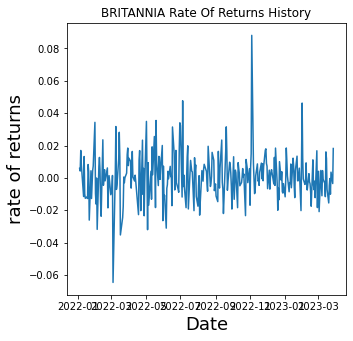

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('BRITANNIA Rate Of Returns History')
plt.plot(data['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

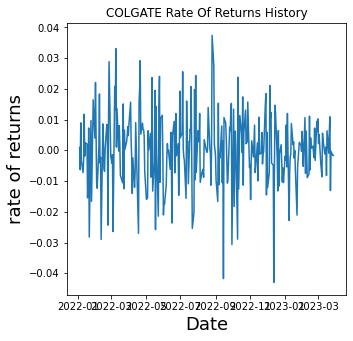

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('COLGATE Rate Of Returns History')
plt.plot(data1['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

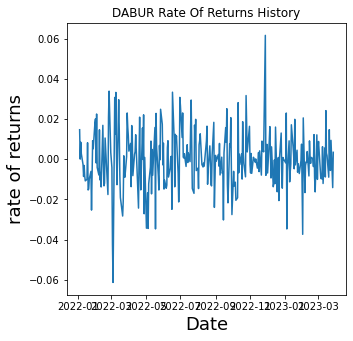

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('DABUR Rate Of Returns History')
plt.plot(data2['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

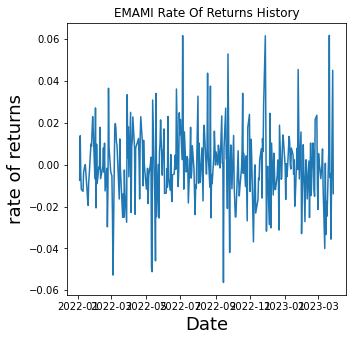

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('EMAMI Rate Of Returns History')
plt.plot(data3['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

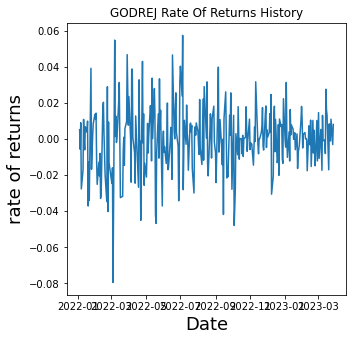

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('GODREJ Rate Of Returns History')
plt.plot(data4['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

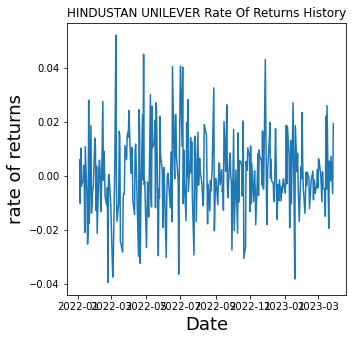

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('HINDUSTAN UNILEVER Rate Of Returns History')
plt.plot(data5['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

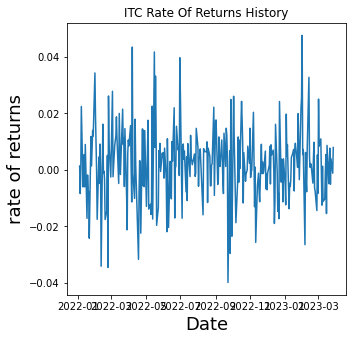

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('ITC Rate Of Returns History')
plt.plot(data6['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

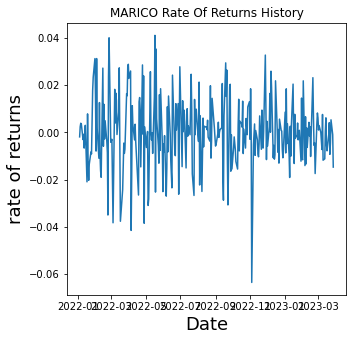

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('MARICO Rate Of Returns History')
plt.plot(data7['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

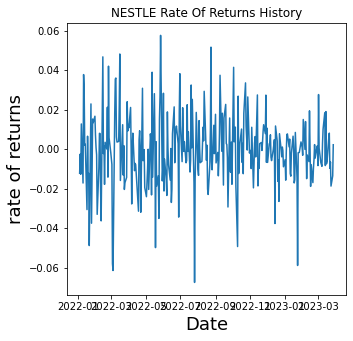

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('NESTLE Rate Of Returns History')
plt.plot(data8['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

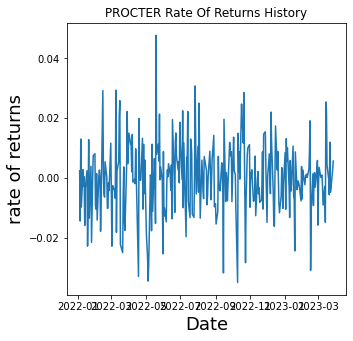

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('PROCTER Rate Of Returns History')
plt.plot(data9['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

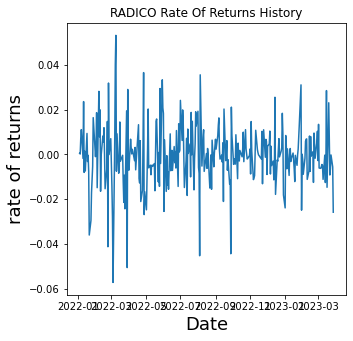

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('RADICO Rate Of Returns History')
plt.plot(data10['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

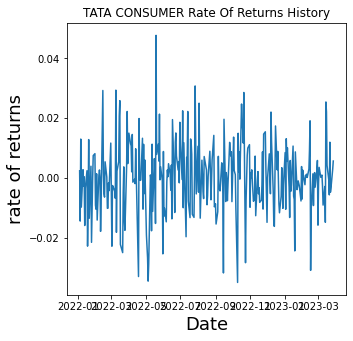

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('TATA CONSUMER Rate Of Returns History')
plt.plot(data9['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

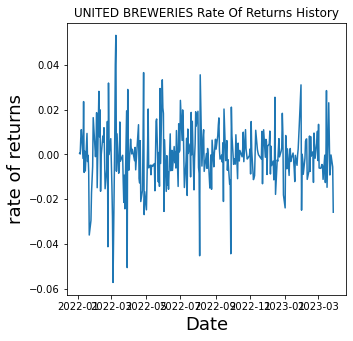

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('UNITED BREWERIES Rate Of Returns History')
plt.plot(data10['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

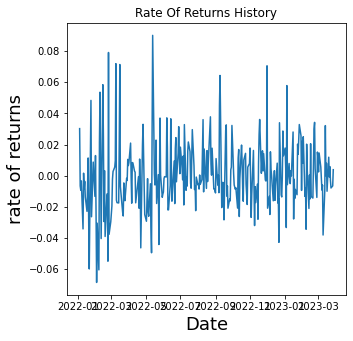

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Rate Of Returns History')
plt.plot(data11['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

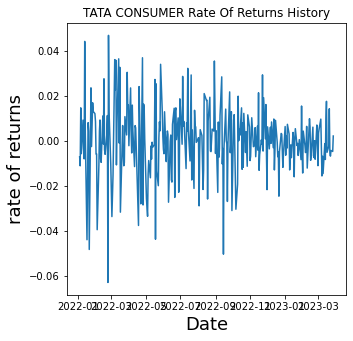

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('TATA CONSUMER Rate Of Returns History')
plt.plot(data12['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

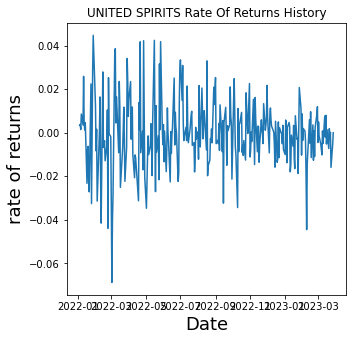

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('UNITED SPIRITS Rate Of Returns History')
plt.plot(data13['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()

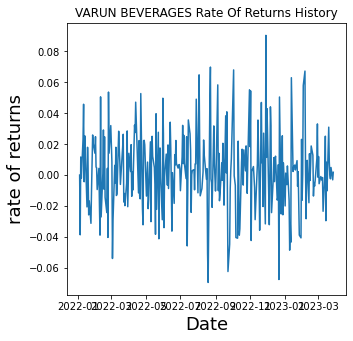

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('VARUN BEVERAGES Rate Of Returns History')
plt.plot(data14['rate of returns'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('rate of returns',fontsize=18)
plt.show()